<a id=section101></a>
# Section 1. Import Libraries and Create MySQL Connection

    

1.   Installing and Upgrading packages
1.   Importing Libraries
1.   Creating MySQL Connection










#1.1 Installing  and Upgrading Packages



In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 3.3 MB/s 


In [ ]:
!pip install -q --upgrade pandas-profiling   # Restart the runtime after upgrading the libraries to get the libraries in sync.

     |████████████████████████████████| 261 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 55.5 MB/s 
     |████████████████████████████████| 10.9 MB 39.9 MB/s 
     |████████████████████████████████| 3.1 MB 45.1 MB/s 
     |████████████████████████████████| 303 kB 58.4 MB/s 
     |████████████████████████████████| 102 kB 10.4 MB/s 
     |████████████████████████████████| 687 kB 66.0 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 49.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Do not execute the above cells after restarting the runtime.**

In [ ]:
!pip install mysql-connector                      # Installing package that is required by MySQL Connection

     |████████████████████████████████| 11.9 MB 5.8 MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=a6fad58e3532e28e59096643359cd1d37a6e0e5df9fa56abd959c36c7ab094e9
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql-connector


In [ ]:
!pip install googletrans                           #Installing package that is required for Google Translator

     |████████████████████████████████| 55 kB 1.9 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.3 MB 7.6 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 65 kB 2.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=52f7e2faefcae19a5975ca0cee6cdd92b1b5a7c045ed106356da5e1f6f30469c
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


#1.2 Importing Libraries

In [ ]:
import mysql.connector
import pandas as pd
from pandas_profiling import ProfileReport
import googletrans
from googletrans import Translator
import numpy as np
import folium
from folium.plugins import MarkerCluster
from collections import Counter

import matplotlib.pyplot as plt  
from matplotlib.pylab import rcParams
import seaborn as sns            
%matplotlib inline
sns.set()

### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.3 Creating MySQL connection



In [ ]:
# connection details
cnx = mysql.connector.connect(
   host="cpanel.insaid.co",
   user="student",
   passwd="student",
   database='Capstone1'
)

<a id=section2></a>
###  Executing MySQL queries

In [ ]:
# open cursor
cursor = cnx.cursor()
# query
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE table_schema ='Capstone1'"
# execute query
cursor.execute(query)
# fetch results
result = cursor.fetchall()
# print results
for table in result:
    print (table)

# close connection
#cnx.close()

(bytearray(b'events_data'),)
(bytearray(b'gender_age_train'),)
(bytearray(b'phone_brand_device_model'),)


In [ ]:
cursor = cnx.cursor()

In [ ]:
query_gender_age_train = ("SELECT * FROM gender_age_train")
query_phone_brand_device_model = ("SELECT * FROM phone_brand_device_model")

In [ ]:
cursor.execute(query_gender_age_train)
table_rows = cursor.fetchall()
df_gender_age_train = pd.DataFrame(table_rows,columns = ['device_id','gender','age','group'])

In [ ]:
cursor.execute(query_phone_brand_device_model)
table_rows = cursor.fetchall()
df_phone_brand_device_model = pd.DataFrame(table_rows, columns=['device_id', 'phone_brand', 'device_model'])

# Section 2. Data Exploration

1.   Data Exploration
2.   Missing data function


## 2.1 Data Exploration

In [ ]:
df_all_events_data = pd.read_csv(filepath_or_buffer="/content/drive/MyDrive/events_data.csv")
print('Data Shape:', df_all_events_data.shape)
df_all_events_data.head()

Data Shape: (3252950, 7)


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [ ]:
print(df_gender_age_train.shape)
df_gender_age_train.head()

(74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [ ]:
print(df_phone_brand_device_model.shape)
df_phone_brand_device_model.head()

(87726, 3)


,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


## 2.2 Missing Data function

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data(df_gender_age_train)

,Total,Percent
device_id,0,0.0
gender,0,0.0
age,0,0.0
group,0,0.0


In [ ]:
missing_data(df_phone_brand_device_model)

,Total,Percent
device_id,0,0.0
phone_brand,0,0.0
device_model,0,0.0


In [ ]:
missing_data(df_all_events_data)

,Total,Percent
device_id,453,0.013926
longitude,423,0.013004
latitude,423,0.013004
state,377,0.011589
event_id,0,0.000000
timestamp,0,0.000000
city,0,0.000000


**Observations**

1.   Events dataframe has missing data across state, device ID,  latitude, and longitude 
1.   No missing data in Gender Age data and Phone Brand Data





#Section 3. Data Analysis
1.   Gender Age Data
1.   Phone Brand Data
2.   Events Data



### 3.1 Gender Age data

In [ ]:
df_gender_age_train.shape

(74645, 4)

In [ ]:
df_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
df_gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [ ]:
df_gender_age_train.describe(include='all')

,device_id,gender,age,group
count,7.464500e+04,74645,74645.000000,74645
unique,NaN,2,NaN,12
top,NaN,M,NaN,M23-26
freq,NaN,47904,NaN,9605
mean,-7.491354e+14,NaN,31.410342,NaN
std,5.327150e+18,NaN,9.868735,NaN
min,-9.223067e+18,NaN,1.000000,NaN
25%,-4.617367e+18,NaN,25.000000,NaN
50%,-1.841362e+16,NaN,29.000000,NaN
75%,4.636656e+18,NaN,36.000000,NaN


In [ ]:
#Finding records by Gender i.e., Male and Female
df_gender_age_train_pieplot = df_gender_age_train['gender'].value_counts()
df_gender_age_train_pieplot

M    47904
F    26741
Name: gender, dtype: int64

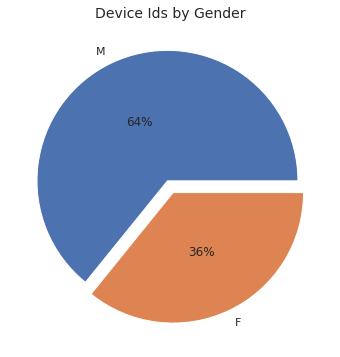

In [ ]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = df_gender_age_train_pieplot.keys()
plt.pie(x=df_gender_age_train_pieplot, autopct="%.0f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Device Ids by Gender", fontsize=14);
pie.savefig("GenderPieChart.png")

Text(0, 0.5, 'Age Groups')

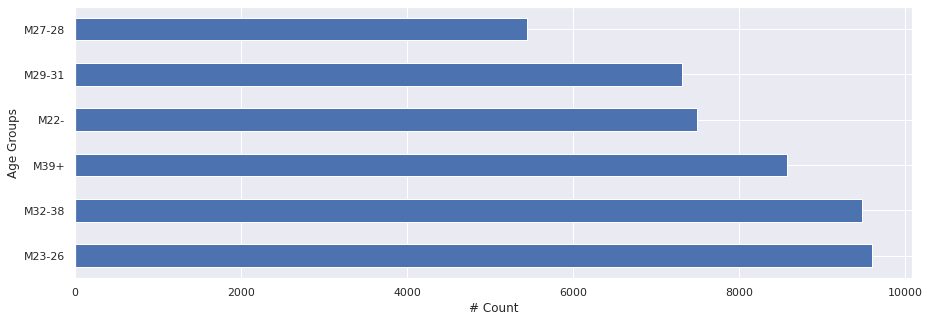

In [ ]:
# Male users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(15,5))
df_gender_age_train[df_gender_age_train['gender']=='M']['group'].value_counts().plot.barh()
plt.xlabel("# Count")
plt.ylabel("Age Groups")

Text(0, 0.5, 'Age Groups')

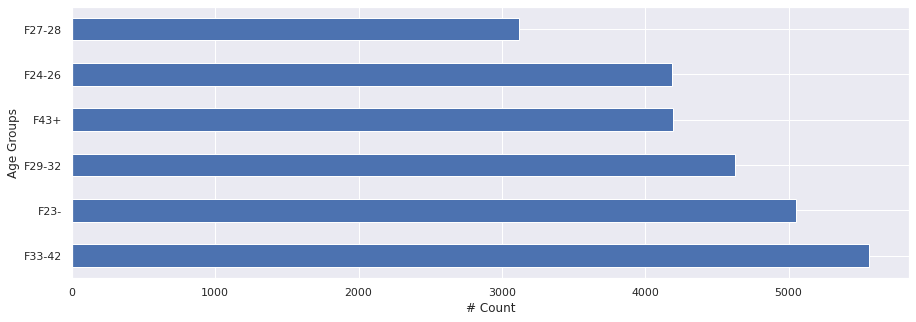

In [ ]:
# Female users age group wise to see which group has maximum mobile usage
plt.figure(figsize=(15,5))
df_gender_age_train[df_gender_age_train['gender']=='F']['group'].value_counts().plot.barh()
plt.xlabel("# Count")
plt.ylabel("Age Groups")

Text(0.5, 0, 'Age')

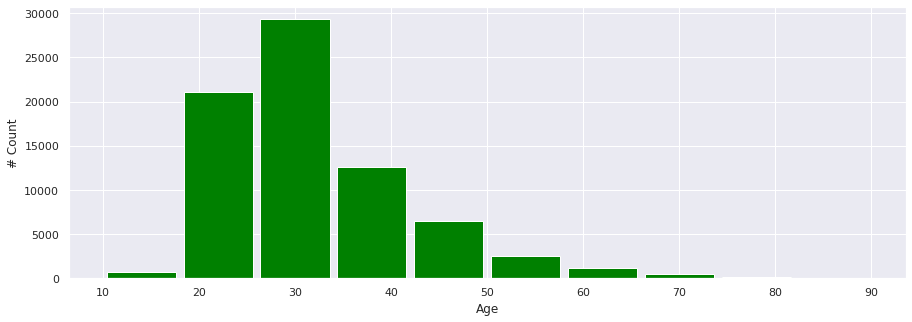

In [ ]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_gender_age_train['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

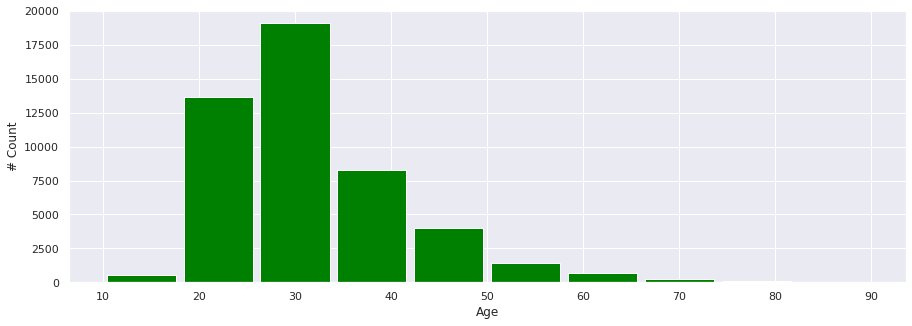

In [ ]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_gender_age_train[df_gender_age_train['gender']=='M']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

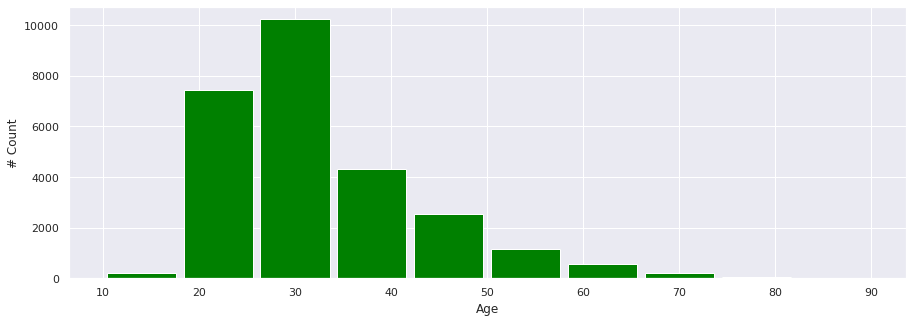

In [ ]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(df_gender_age_train[df_gender_age_train['gender']=='F']['age'], 10, range, color = 'green', histtype = 'bar', rwidth = 0.9)
plt.ylabel("# Count")
plt.xlabel("Age")

**Observations** 
1. 64% of Users are Males and 36% are Females
1.   People/Users who are in their 20s and 30s (years of age) are using the mobile devices more frequently than people of other ages.
2. Data indicates that people stopped using mobile devices after the age of 60. Decline in usage can be observed from the age of 40 yrs to 50 yrs and above.
3. Males have higher frequency of mobile device usage than females.
4. Users are using devices more frequently after they cross the age of 10yrs.  

###3.2 Phone Brand Data

In [ ]:
df_phone_brand_device_model.shape

(87726, 3)

In [ ]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
df_phone_brand_device_model.describe(include='all')

,device_id,phone_brand,device_model
count,8.772600e+04,87726,87726
unique,NaN,116,1467
top,NaN,小米,红米note
freq,NaN,21645,3500
mean,-5.212557e+15,NaN,NaN
std,5.330157e+18,NaN,NaN
min,-9.223322e+18,NaN,NaN
25%,-4.623331e+18,NaN,NaN
50%,-3.109802e+16,NaN,NaN
75%,4.635194e+18,NaN,NaN


In [ ]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [ ]:
# available languages for translation
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [ ]:
translator = Translator() # create a translator object
# use translate method to translate a string - by default, the destination language is english
phone_brand_chinese_names = df_phone_brand_device_model[(df_phone_brand_device_model['phone_brand'].str.contains(r'[\u4e00-\u9FFF]', regex=True))]
phone_brand_chinese_names

,device_id,phone_brand,device_model
1,-3766087376657242966,小米,V183
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
5,-8896952452425303597,小米,红米Note3
6,-2634171391322875113,小米,S5.1
...,...,...,...
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2


In [ ]:
brands_in_chinese = ['华为','小米','三星','魅族','酷派','乐视','联想 ','vivo','OPPO','HTC','LG','TCL','LOGO','Lovme','ZUK','PPTV','努比亚','海信','天语','夏新','欧比', '优米', '欧博信', '奇酷', '锤子', '酷比魔方', '语信', '朵唯', '德赛', '一加',
       '华硕', '普耐尔', '易派', '摩托罗拉', '优购', '酷珀', '梦米', '爱派尔', '昂达', '邦华',
       '聆韵', '中国移动', '诺亚信', '酷比', '艾优尼', '斐讯', '富可视', '欧新', '美图', '宝捷讯',
       '青橙', '果米', '波导', '诺基亚', '神舟', '糯米', '亿通', '纽曼', '唯米', '百立丰',
       '沃普丰', '虾米', '凯利通', '贝尔丰', '至尊宝', '蓝魔', '青葱', '白米', '大可乐', '尼比鲁',
       '康佳', '乡米', '黑米', '海尔', '优语', '维图', '米歌', '广信', 'E派', '小杨树', '糖葫芦',
       '西米', '谷歌', '长虹', '飞利浦', '惠普', '台电', '大Q', '鲜米', '先锋', '欧奇']
brands_in_english = ['Huawei','Xiaomi','Samsung','Meizu','Coolpad','LeEco','Lenovo','vivo','OPPO','HTC','LG','TCL','LOGO','Lovme','ZUK','PPTV','Nubia','Hisense','Amagatarai','Amoi','Obi', 'Youmi', 'Obson', 'Qiku', 'Hammer', 'Cubei Cube', 'Letters', 'Duowei', 'Desai', 'One Plus','ASUS', 'Punale', 'Yipai', 'Motorola', 'Yougo', 'Cooper', 'Mengmi', 'Aipair', 'Onda', 'Banghua', 'Lingyun', 'China Mobile', 'Noah',' Coolby ',' Aiyouni ',' Feixun ',' Focus', 'Ou Xin', 'Meitu', 'Projet News','Green Orange', 'Fruit Rice', 'Flyer', 'Nokia', 'Shenzhou', 'Glutinous Rice', 'Yi Tong', 'Newman', 'Wei Mi', 'Bai Li Feng','Wopfung', 'Shrimp', 'Kellystone', 'Bellfonte', 'Extreme Treasure', 'Blue Devils', 'Scallion', 'White Rice', 'Big Cola', 'Nibiru','Kangjia', 'Xianmi', 'Black Rice', 'Haier', 'Youyu', 'Weitu', 'Mi Ge', 'Guangxin', 'E-Pay', 'Little Poplar', ' Candied ','Simi', 'Google', 'Changhong', 'Philips', 'HP', 'Taipower', 'Big Q', 'Fresh Rice', 'Pioneer', 'Ouqi']

brands_dict1 = dict(zip(brands_in_chinese, brands_in_english)) 


In [ ]:
def translator(val):
    if val in brands_dict1:
        return brands_dict1[val]
    else:
        return val

In [ ]:
df_phone_brand_device_model.phone_brand = df_phone_brand_device_model.phone_brand.apply(translator)

In [ ]:
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,红米Note2


In [ ]:
df_phone_brand_device_model['phone_brand'].value_counts()

Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
           ...  
恒宇丰            1
帷幄             1
西门子            1
世纪星            1
瑞米             1
Name: phone_brand, Length: 116, dtype: int64

Text(0.5, 0, 'Phone Brands')

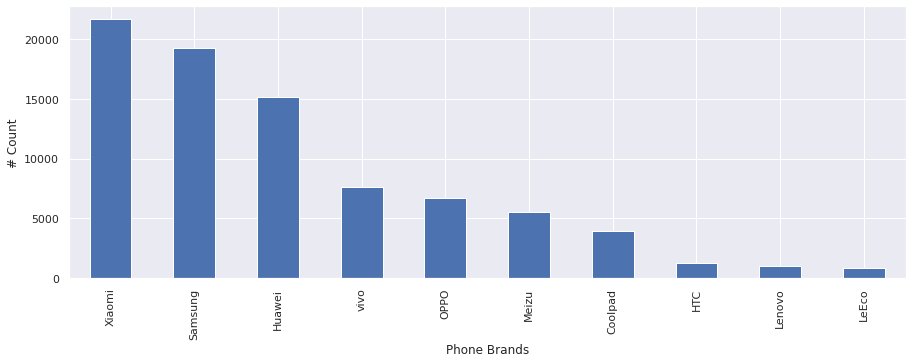

In [ ]:
# Phone brands having maximum mobile usage
plt.figure(figsize=(15,5))
df_phone_brand_device_model['phone_brand'].value_counts().head(10).plot.bar()
plt.ylabel("# Count")
plt.xlabel("Phone Brands")

In [ ]:
df_phone_brand_device_model['device_model'].value_counts().head(10)

红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
荣耀6              1471
荣耀畅玩4X           1279
荣耀3C             1206
Name: device_model, dtype: int64

In [ ]:
df_phone_brand_device_model['device_model'].replace({'红米note': 'Redmi note', '荣耀6 plus': 'Redmi 1S', '天鉴W900S': 'Tianjian W900S','乐檬X3': 'Music lemon X3', '荣耀6': 'Glory 6', '荣耀畅玩4X': 'Honor Play 4X', '荣耀3C': 'Glory 3C', '荣耀6 Plus':'Honor 6 Plus' }, inplace=True)

Text(0.5, 0, 'Device Models')

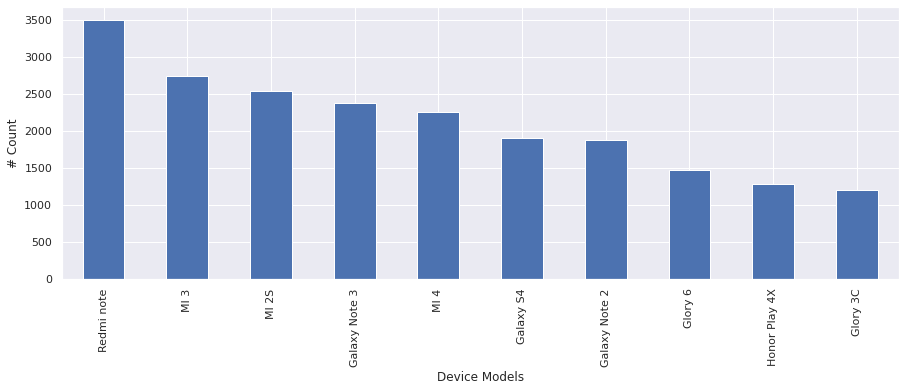

In [ ]:
#Device Models having maximum Mobile usage
plt.figure(figsize=(15,5))
df_phone_brand_device_model['device_model'].value_counts().head(10).plot.bar()
plt.ylabel("# Count")
plt.xlabel("Device Models")

In [ ]:
for i in df_phone_brand_device_model['phone_brand'].head(10).unique():
    print ('-----',i,'------')
    print (df_phone_brand_device_model[df_phone_brand_device_model['phone_brand']==i]['device_model'].value_counts().head())

----- vivo ------
X3T      425
X5Pro    401
X3L      333
Xplay    293
X5SL     279
Name: device_model, dtype: int64
----- Xiaomi ------
Redmi note    3500
MI 3          2739
MI 2S         2547
MI 4          2256
红米1S          1191
Name: device_model, dtype: int64
----- OPPO ------
R7         663
R7 Plus    459
R7s        423
Find 7     381
R3         335
Name: device_model, dtype: int64
----- Samsung ------
Galaxy Note 3    2378
Galaxy S4        1910
Galaxy Note 2    1877
Galaxy S3        1156
Galaxy S5         827
Name: device_model, dtype: int64


**Observations** 
1.   There are Chinese names for phone_brand & device_model which needs to be translated to English
2.   Used Google Translator to translate names from chinese to english
1.  Xiaomi is the most popular phone brand followed by Samsung and Huawei
2.  Redmi Note is the most popular device model being used, followed by MI series and Galaxy Note 3
1.  Xiaomi brand and its models are most preferred followed closely by Samsung



### 3.3 Events Data

In [ ]:
df_all_events_data.shape

(3252950, 7)

In [ ]:
df_all_events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [ ]:
df_all_events_data.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [ ]:
missing_data(df_all_events_data)

,Total,Percent
device_id,453,0.013926
longitude,423,0.013004
latitude,423,0.013004
state,377,0.011589
event_id,0,0.000000
timestamp,0,0.000000
city,0,0.000000


<a id=section201></a>
#Section 4. Missing data Imputation 

We have seen above that in Events Data - `state`, `longitude`, `latitude` and `device_id` have missing values, we will be imputing these values before performing any analysis

In [ ]:
# Get a series of unique values in column 'State' of the dataframe
uniqueValues = df_all_events_data['state'].unique()
print('Unique elements in column "state" ')
print(uniqueValues)

Unique elements in column "state" 
['Delhi' 'WestBengal' 'TamilNadu' 'Jharkhand' 'AndhraPradesh'
 'Maharashtra' 'Gujarat' 'Kerala' 'MadhyaPradesh' 'Karnataka' 'Rajasthan'
 'Orissa' 'Punjab' 'UttarPradesh' 'Nagaland' 'Haryana' 'Telangana'
 'Chhattisgarh' 'Bihar' 'JammuandKashmir' 'Assam' 'Goa' 'Mizoram'
 'Tripura' 'Uttaranchal' nan 'Pondicherry' 'Manipur' 'Meghalaya'
 'ArunachalPradesh' 'HimachalPradesh' 'Chandigarh'
 'AndamanandNicobarIslands']


In [ ]:
# Print unique 'City' values corresponding to where 'State' value is null
df_all_events_data[df_all_events_data['state'].isnull()]['city'].unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

<a id=section202></a>
#### 4.1 Imputing missing 'State' values

**LIST OF STATES PROVIDED TO ANALYSE** - 'Rajasthan', 'UttarPradesh', 'Haryana', 'Jharkhand', 'Telangana', 'Orissa', 'Assam'

In [ ]:
list_of_states = ['Rajasthan', 'UttarPradesh', 'Haryana', 'Jharkhand', 'Telangana', 'Orissa', 'Assam'] 

In [ ]:
df_all_events_data.loc[(df_all_events_data['city'] =='Jaipur') & (df_all_events_data['state'].isnull()),'state'] ='Rajasthan' 

**Reducing Events Data based on given states**

In [ ]:
df_events_data = df_all_events_data.loc[df_all_events_data['state'].isin(list_of_states)] 

In [ ]:
df_events_data.shape

(370982, 7)

In [ ]:
missing_data(df_events_data)

,Total,Percent
device_id,81,0.021834
longitude,66,0.017791
latitude,66,0.017791
event_id,0,0.000000
timestamp,0,0.000000
city,0,0.000000
state,0,0.000000


**Observations** 
1.   Missing State values have been replaced


 #### 4.2 Imputing missing 'Latitude' and 'Longitude' values

In [ ]:
# Print unique 'City' and 'State' values corresponding to where 'Latitude' and 'Longitude' value is null
df_events_data[df_events_data['latitude'].isnull()]['city'].unique()

array(['Jaipur'], dtype=object)

In [ ]:
df_events_data[df_events_data['latitude'].isnull()]['state'].unique()

array(['Rajasthan'], dtype=object)

In [ ]:
pd.reset_option('^display.', silent=True)
c = ['state','city','longitude','latitude']
l = ['Jaipur']
df_events_data[c][df_events_data['city'].isin(l)].groupby(df_events_data['city']).describe()

longitude                                                      \
           count       mean       std      min        25%        50%   
city                                                                   
Jaipur  156980.0  75.853519  0.279354  12.5674  75.834893  75.854482   

                              latitude                                  \
              75%        max     count       mean       std        min   
city                                                                     
Jaipur  75.876432  75.899941  156980.0  26.974426  0.077551  26.930045   

                                                  
              25%        50%        75%      max  
city                                              
Jaipur  26.951918  26.972951  26.996641  41.8719

In [ ]:
Jaipur_latitude_mode = df_events_data['latitude'][df_events_data['city'] == 'Jaipur'].mode()
Jaipur_latitude_mode

0    26.949746
dtype: float64

In [ ]:
Jaipur_longitude_mode = df_events_data['longitude'][df_events_data['city'] == 'Jaipur'].mode()
Jaipur_longitude_mode

0    75.894057
dtype: float64

In [ ]:
df_events_data.loc[(df_events_data['city'] =='Jaipur') & (df_events_data['longitude'].isnull()),'longitude']= '75.894057'
df_events_data.loc[(df_events_data['city'] =='Jaipur') & (df_events_data['latitude'].isnull()),'latitude']= '26.949746'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
missing_data(df_events_data)

,Total,Percent
device_id,81,0.021834
event_id,0,0.000000
timestamp,0,0.000000
longitude,0,0.000000
latitude,0,0.000000
city,0,0.000000
state,0,0.000000


In [ ]:
df_events_data.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
54,1888847,-2.801062e+17,2016-05-02 15:52:42,75.863671,26.93117,Jaipur,Rajasthan
57,2342814,5.163961e+18,2016-05-04 16:26:56,75.813028,26.955495,Jaipur,Rajasthan
59,311140,-8.853338e+18,2016-05-07 15:16:03,82.921957,18.736368,Sunabeda,Orissa
68,3166154,6.422749e+18,2016-05-03 19:10:45,79.162313,28.290387,Aonla,UttarPradesh
84,1716705,6.689380e+18,2016-05-07 12:37:29,77.383203,30.257829,Jagadhri,Haryana
96,1442144,-7.015244e+18,2016-05-03 02:23:14,78.54467,17.435525,Hyderabad,Telangana
101,2787217,8.105133e+18,2016-05-07 19:29:03,75.867452,26.985617,Jaipur,Rajasthan
103,2715764,-9.000825e+18,2016-05-01 06:37:20,79.786918,28.029717,Tilhar,UttarPradesh
107,1856551,-6.071853e+18,2016-05-05 15:27:28,75.841276,26.978374,Jaipur,Rajasthan


In [ ]:
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 4 to 3252939
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370901 non-null  float64
 2   timestamp  370982 non-null  object 
 3   longitude  370982 non-null  object 
 4   latitude   370982 non-null  object 
 5   city       370982 non-null  object 
 6   state      370982 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 30.7+ MB


**Observations** 
1.   Missing longitude and latitude values have been replaced

 #### 4.3 Imputing missing 'device_id' values

In [ ]:
df_events_data[df_events_data['device_id'].isnull()]['city'].unique()

array(['Jaipur'], dtype=object)

In [ ]:
df_events_data[df_events_data['device_id'].isnull()].groupby(df_events_data['city']).count()

,event_id,device_id,timestamp,longitude,latitude,city,state
city,,,,,,,
Jaipur,81,0,81,81,81,81,81


In [ ]:
pd.options.display.float_format = '{:30,.1f}'.format
df_events_data['device_id'][df_events_data['city']=='Jaipur'].mode()

0     -5,330,178,848,098,270,208.0
dtype: float64

In [ ]:
df_events_data.loc[(df_events_data['city'] =='Jaipur') & (df_events_data['device_id'].isnull()), 'device_id']= '-5330178848098270208'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
missing_data(df_events_data)

,Total,Percent
event_id,0,0.0
device_id,0,0.0
timestamp,0,0.0
longitude,0,0.0
latitude,0,0.0
city,0,0.0
state,0,0.0


In [ ]:
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 4 to 3252939
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   event_id   370982 non-null  int64 
 1   device_id  370982 non-null  object
 2   timestamp  370982 non-null  object
 3   longitude  370982 non-null  object
 4   latitude   370982 non-null  object
 5   city       370982 non-null  object
 6   state      370982 non-null  object
dtypes: int64(1), object(6)
memory usage: 30.7+ MB


**Observations** 
1.   Missing Device_id values have been replaced

#Section 5. Identifying anamolies in Latitude and Longitude

In [ ]:
#converting longitude and latitude to float values
df_events_data.loc[:,'longitude':'latitude']=df_events_data.loc[:,'longitude':'latitude'].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [ ]:
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 4 to 3252939
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370982 non-null  object 
 2   timestamp  370982 non-null  object 
 3   longitude  370982 non-null  float64
 4   latitude   370982 non-null  float64
 5   city       370982 non-null  object 
 6   state      370982 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 30.7+ MB


#####5.1 Distribution of Longitude and Latitude across Events Data

Text(0.5, 0, 'Longitude')

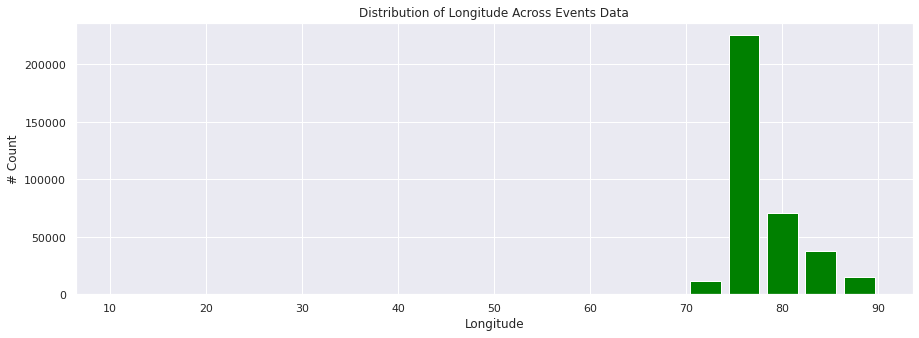

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df_events_data['longitude'], 20, range, color = 'green', histtype = 'bar', rwidth = 0.8)
plt.title('Distribution of Longitude Across Events Data');
plt.ylabel("# Count")
plt.xlabel("Longitude")

Text(0.5, 0, 'Latitude')

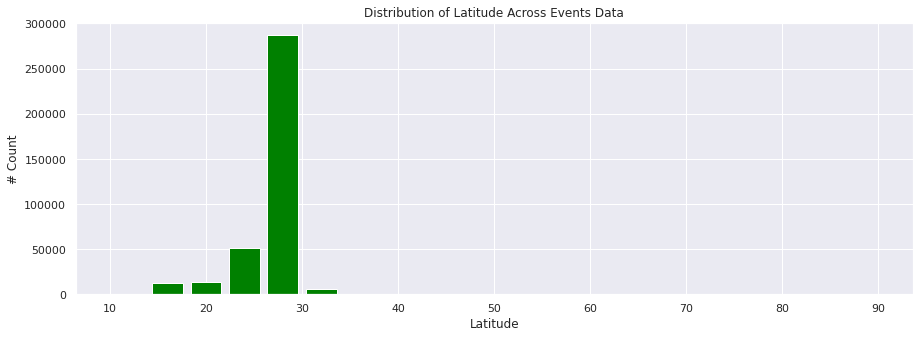

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(df_events_data['latitude'], 20, range, color = 'green', histtype = 'bar', rwidth = 0.8)
plt.title('Distribution of Latitude Across Events Data');
plt.ylabel("# Count")
plt.xlabel("Latitude")

Text(0, 0.5, '# Value')

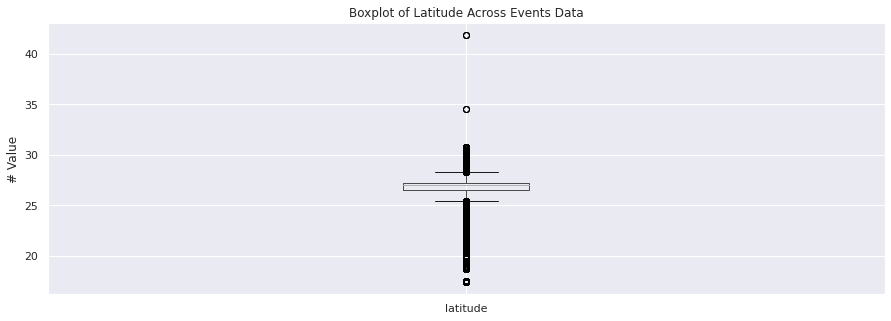

In [ ]:
plt.figure(figsize=(15,5))
boxplot = df_events_data.boxplot(column='latitude')
plt.title('Boxplot of Latitude Across Events Data');
plt.ylabel("# Value")

Text(0, 0.5, '# Value')

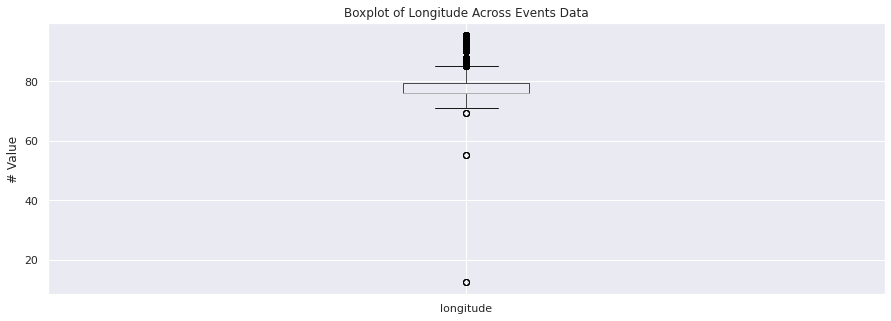

In [ ]:
plt.figure(figsize=(15,5))
boxplot = df_events_data.boxplot(column='longitude')
plt.title('Boxplot of Longitude Across Events Data');
plt.ylabel("# Value")

**Observations**


1.   There are outliers on the Longitude data



##### 5.2 Anomaly Detection

In [ ]:
#Identifying data that is on the outliers of Longitude values
df_longitude_outliers = df_events_data[df_events_data['longitude']<70]
df_longitude_outliers

,event_id,device_id,timestamp,longitude,latitude,city,state
82827,170433,"4,718,752,803,626,400,768.0",2016-05-07 01:39:40,12.6,41.9,Jaipur,Rajasthan
1598260,3228359,"4,718,752,803,626,400,768.0",2016-05-02 11:50:26,12.6,41.9,Jaipur,Rajasthan
1691284,252730,"-3,693,510,914,308,259,840.0",2016-05-04 15:13:00,69.2,34.6,Jaipur,Rajasthan
2029146,3188661,"4,718,752,803,626,400,768.0",2016-05-07 16:08:20,12.6,41.9,Jaipur,Rajasthan
2109310,3176004,"-1,926,548,054,995,953,664.0",2016-05-05 19:45:52,55.3,25.2,Bari,Rajasthan
2244458,3195812,"-3,693,510,914,308,259,840.0",2016-05-07 12:15:05,69.2,34.6,Jaipur,Rajasthan
2838297,3223664,"-3,693,510,914,308,259,840.0",2016-05-01 07:59:07,69.2,34.6,Jaipur,Rajasthan
2963678,281233,"-1,926,548,054,995,953,664.0",2016-05-05 16:25:00,55.3,25.2,Bari,Rajasthan
3229520,3116389,"-1,926,548,054,995,953,664.0",2016-05-05 19:41:04,55.3,25.2,Bari,Rajasthan


In [ ]:
df_longitude_outliers['city'].unique() #list of city names on the outliers data

array(['Jaipur', 'Bari'], dtype=object)

In [ ]:
df_longitude_outliers['city'].value_counts() #count of records on the outliers data

Jaipur    6
Bari      3
Name: city, dtype: int64

In [ ]:
df_longitude_outliers[df_longitude_outliers['city']=='Jaipur']['longitude'].mode() #Jaipur city's mode value on outliers data

0                             12.6
1                             69.2
dtype: float64

In [ ]:
df_events_data[df_events_data['city']=='Jaipur']['longitude'].mode() #Jaipur city's mode value on Events data

0                             75.9
dtype: float64

In [ ]:
df_events_data[df_events_data['city']=='Jaipur'].nunique()

event_id     157046
device_id      1544
timestamp    133716
longitude      1531
latitude       1527
city              1
state             1
dtype: int64

In [ ]:
df_longitude_outliers[df_longitude_outliers['city']=='Bari']['longitude'].mode() #Bari city's mode value on outliers data

0                             55.3
dtype: float64

In [ ]:
df_events_data[df_events_data['city']=='Bari']['longitude'].mode() #Bari city's mode value on outliers data

0                             77.7
dtype: float64

In [ ]:
df_events_data[df_events_data['city']=='Bari'].nunique() #Bari city's mode value on Events data

event_id     1584
device_id      38
timestamp    1577
longitude      39
latitude       39
city            1
state           1
dtype: int64

In [ ]:
#Identifying data that is on the outliers of latitude values
df_latitude_outliers = df_events_data[df_events_data['latitude']>32]
df_latitude_outliers

,event_id,device_id,timestamp,longitude,latitude,city,state
82827,170433,"4,718,752,803,626,400,768.0",2016-05-07 01:39:40,12.6,41.9,Jaipur,Rajasthan
1598260,3228359,"4,718,752,803,626,400,768.0",2016-05-02 11:50:26,12.6,41.9,Jaipur,Rajasthan
1691284,252730,"-3,693,510,914,308,259,840.0",2016-05-04 15:13:00,69.2,34.6,Jaipur,Rajasthan
2029146,3188661,"4,718,752,803,626,400,768.0",2016-05-07 16:08:20,12.6,41.9,Jaipur,Rajasthan
2244458,3195812,"-3,693,510,914,308,259,840.0",2016-05-07 12:15:05,69.2,34.6,Jaipur,Rajasthan
2838297,3223664,"-3,693,510,914,308,259,840.0",2016-05-01 07:59:07,69.2,34.6,Jaipur,Rajasthan


In [ ]:
df_latitude_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 82827 to 2838297
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   6 non-null      int64  
 1   device_id  6 non-null      object 
 2   timestamp  6 non-null      object 
 3   longitude  6 non-null      float64
 4   latitude   6 non-null      float64
 5   city       6 non-null      object 
 6   state      6 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 384.0+ bytes


In [ ]:
city_list = ['Bari', 'Jaipur']

In [ ]:
df_longitude_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 82827 to 3229520
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   9 non-null      int64  
 1   device_id  9 non-null      object 
 2   timestamp  9 non-null      object 
 3   longitude  9 non-null      float64
 4   latitude   9 non-null      float64
 5   city       9 non-null      object 
 6   state      9 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 576.0+ bytes


In [ ]:
#folium map of outliers data
map_lon = folium.Map(location=[22, 77], zoom_start=5)

mCluster2 = folium.MarkerCluster().add_to(map_lon)

locations24 = df_longitude_outliers[['latitude', 'longitude']]
locationlist2 = locations24.values.tolist()
    
for item in enumerate(locationlist2):
        folium.Marker(location=item, popup="Jaipur").add_to(mCluster2)

folium.LayerControl().add_to(map_lon)                             
map_lon.save("Outliers on Longitude.html")
map_lon

In [ ]:
#folium map of outliers data
map_lat = folium.Map(location=[22, 77], zoom_start=5)

mCluster3 = folium.MarkerCluster().add_to(map_lat)

locations25 = df_latitude_outliers[['latitude', 'longitude']]
locationlist3 = locations25.values.tolist()
    
for item in enumerate(locationlist3):
        folium.Marker(location=item, popup="Jaipur").add_to(mCluster3)

folium.LayerControl().add_to(map_lat)                             
map_lat.save("Outliers on latitude.html")
map_lat

In [ ]:
mylist22 = df_events_data[df_events_data['longitude']<70]['event_id'].index.to_list()
for i in mylist22:
    df_events_data.at[i,'longitude']=df_events_data[df_events_data['city']=='Jaipur']['longitude'].mode()
    df_events_data.at[i,'latitude']=df_events_data[df_events_data['city']=='Jaipur']['latitude'].mode()

In [ ]:
mylist44 = df_events_data[df_events_data['latitude']>32]['event_id'].index.to_list()
for i in mylist44:
    df_events_data.at[i,'latitude']=df_events_data[df_events_data['city']=='Jaipur']['latitude'].mode()
    df_events_data.at[i,'longitude']=df_events_data[df_events_data['city']=='Jaipur']['longitude'].mode()

In [ ]:
mylist55 = df_events_data[df_events_data['longitude']<70]['event_id'].index.to_list()
for i in mylist55:
    df_events_data.at[i,'longitude']=df_events_data[df_events_data['city']=='Bari']['longitude'].mode()
    df_events_data.at[i,'latitude']=df_events_data[df_events_data['city']=='Bari']['latitude'].mode()

Text(0, 0.5, '# Value')

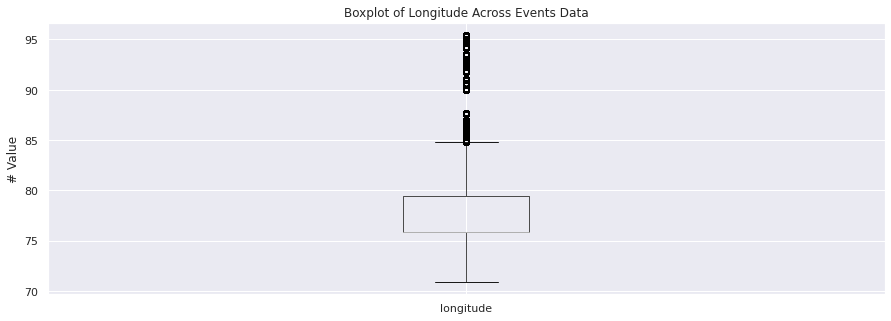

In [ ]:
plt.figure(figsize=(15,5))
boxplot = df_events_data.boxplot(column='longitude')
plt.title('Boxplot of Longitude Across Events Data');
plt.ylabel("# Value")

Text(0, 0.5, '# Value')

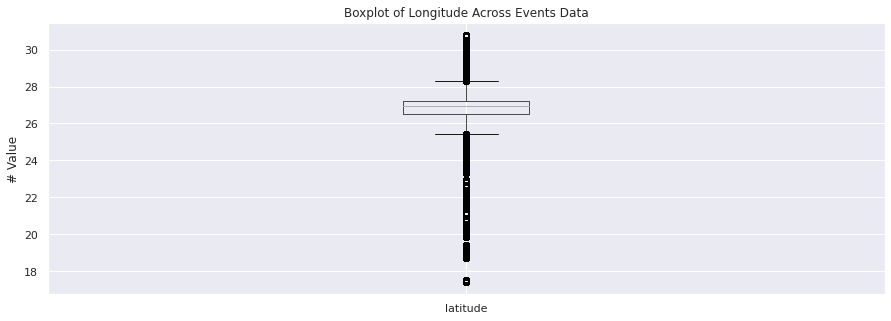

In [ ]:
plt.figure(figsize=(15,5))
boxplot = df_events_data.boxplot(column='latitude')
plt.title('Boxplot of Longitude Across Events Data');
plt.ylabel("# Value")

<a id=section206></a>
##### 5.3 Merging Datasets - Phone, Gender and Events

In [ ]:
df_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
df_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
df_events_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 4 to 3252939
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370982 non-null  object 
 2   timestamp  370982 non-null  object 
 3   longitude  370982 non-null  float64
 4   latitude   370982 non-null  float64
 5   city       370982 non-null  object 
 6   state      370982 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 30.7+ MB


In [ ]:
df_phone_brand_device_model['device_id']=df_phone_brand_device_model['device_id'].astype(float)

In [ ]:
df_gender_age_train['device_id']=df_gender_age_train['device_id'].astype(float)

In [ ]:
df_events_data['device_id']=df_events_data['device_id'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfs = [df_phone_brand_device_model, df_gender_age_train, df_events_data]

In [ ]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,on='device_id'), dfs)

In [ ]:
df_final_data_onMerge = df_events_data.merge(df_phone_brand_device_model,on='device_id').merge(df_gender_age_train,on='device_id')

In [ ]:
df_final.shape

(370982, 12)

In [ ]:
df_final_data_onMerge.shape

(370982, 12)

In [ ]:
locations = df_events_data[['latitude','longitude']]
locationlist = locations.values.tolist()
length_of_location_list = len(locationlist)
length_of_location_list

370982

**Observations**


1.   Total of 9 records for wrong Longitudes (belonging to Jaipur and Bari from Rajasthan) and 6 records for wrong latitudes (all from Jaipur).
2.   All the incorrect records have been corrected using the mode value of longitude and latitudes from the events data set
1.   Merged all three dataframes of Gender Age, Phone Brand and Events data using device_id 
2.   Total of 370982 data sets have been obtained after merging
1.   Data has been completely pre-processed for missing values and wrong details of longitude and latitude.

<a id=section205></a>
### 5.4 Pre-processing Pandas Profile

In [ ]:
profile = ProfileReport(df_final, title="Pandas Profiling Report for events data")
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_final.shape

(370982, 12)

In [ ]:
missing_data(df_final)

,Total,Percent
device_id,0,0.0
phone_brand,0,0.0
device_model,0,0.0
gender,0,0.0
age,0,0.0
group,0,0.0
event_id,0,0.0
timestamp,0,0.0
longitude,0,0.0
latitude,0,0.0


**Unique Devices on Final Data**

In [ ]:
valueDevice = df_final['device_id'].unique()
LenValue = len(valueDevice)
LenValue

12491

**Final File written to CSV**

In [ ]:
df_final.to_csv('final_file.csv')

#Section 6. Data Analysis on Processsed Data

**CREATING DISTINCT USER GROUP**

In [ ]:
user_data = df_final.drop(['event_id','timestamp'],axis=1)
user_data = user_data.drop_duplicates(keep='first').reset_index()
print(user_data.shape)
user_data.head(2)

(12500, 11)


,index,device_id,phone_brand,device_model,gender,age,group,longitude,latitude,city,state
0,0,"245,133,531,816,851,872.0",SUGAR,时尚手机,M,30,M29-31,77.7,27.6,Mathura,UttarPradesh
1,4,"-8,098,239,495,777,311,744.0",Xiaomi,MI 2S,M,38,M32-38,75.8,29.2,Hisar,Haryana


***USER GROUP DISTRIBUTION***

<a id=section400></a>
###### 6.1 Distribution of Users(device_id) across States

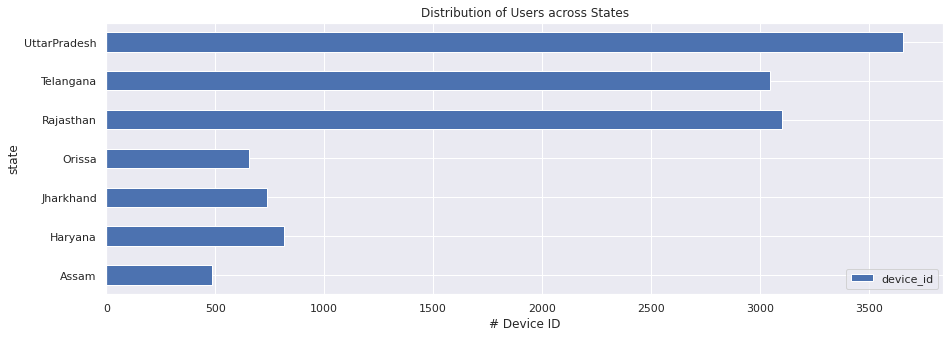

In [ ]:
plt.figure(figsize=(15,5))
user_data.groupby('state').device_id.count().plot(kind='barh')
plt.title('Distribution of Users across States');
plt.xlabel("# Device ID")
plt.legend();
plt.savefig("Distribution of Users across state.png")

###### 6.2 Distribution of Users across Phone Brands(10 Most used Phone Brands)

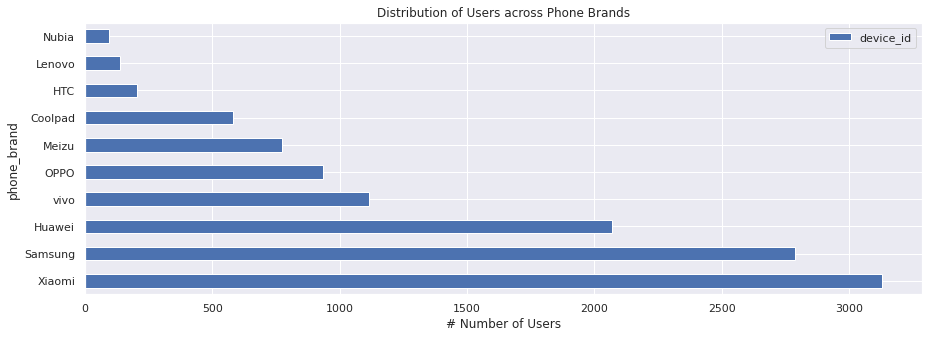

In [ ]:
plt.figure(figsize=(15,5))
user_data.groupby('phone_brand').device_id.count().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Distribution of Users across Phone Brands');
plt.xlabel('# Number of Users');
plt.legend();
plt.savefig("Distribution of Users across Phone Brands.png")

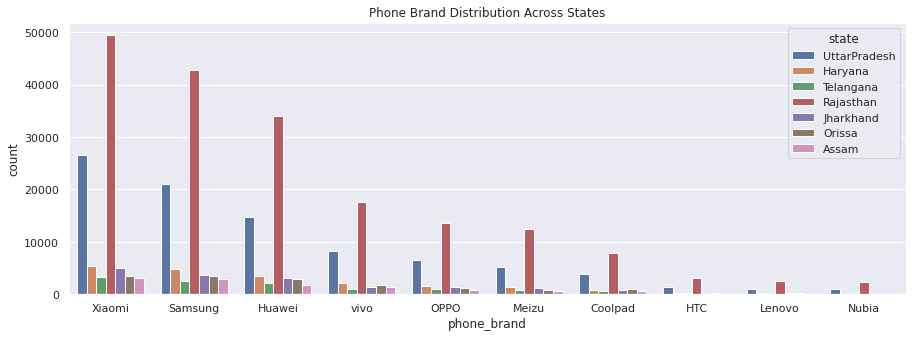

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='phone_brand', hue="state",order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Phone Brand Distribution Across States")
plt.savefig("Phone Brand Distribution Across States.png")

Text(0.5, 1.0, 'Device Model Distribution Across States')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0, flags=flags)


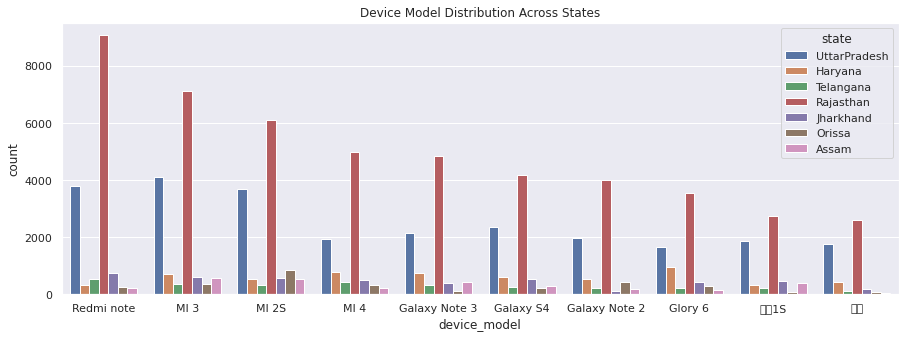

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='device_model', hue="state",order=df_final.device_model.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Device Model Distribution Across States")

###### 6.3 Distribution of Users across Gender

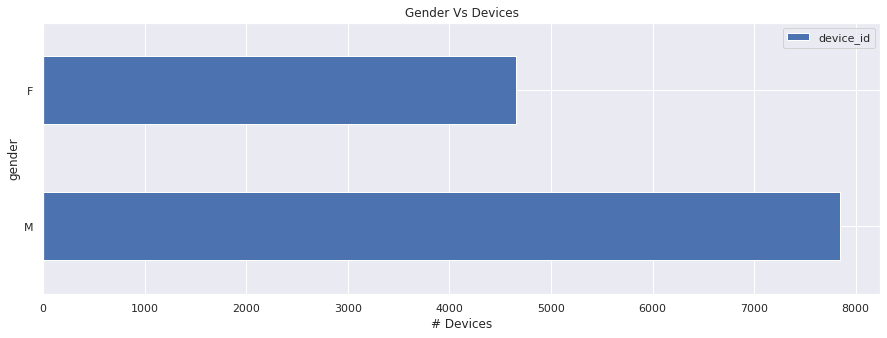

In [ ]:
plt.figure(figsize=(15,5))
user_data.groupby('gender').device_id.count().sort_values(ascending=False).plot(kind='barh')
plt.title('Gender Vs Devices')
plt.xlabel('# Devices')
plt.legend()


Text(0.5, 1.0, 'Gender Distribution on events')

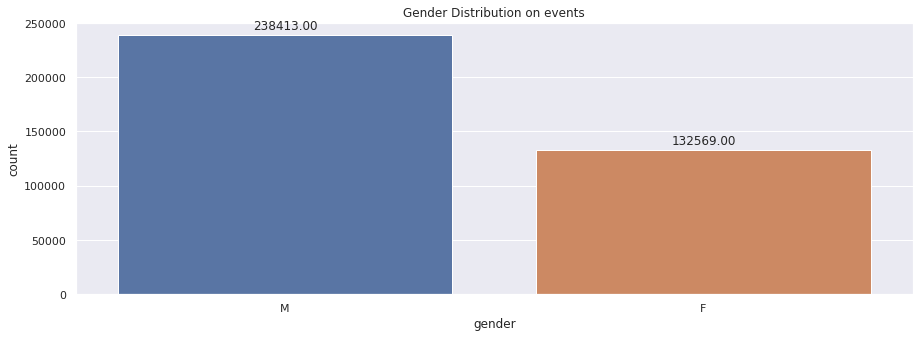

In [ ]:
axis1 = plt.subplots(1,1,figsize=(15,5))
splot = sns.countplot(x='gender',data=df_final)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Gender Distribution on events")

M    7849
F    4651
Name: gender, dtype: int64


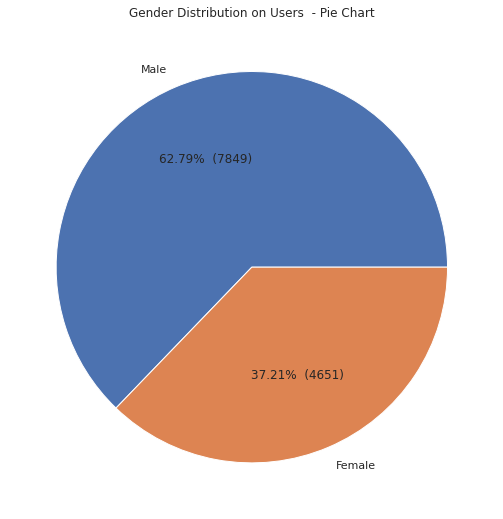

In [ ]:
axis1 = plt.subplots(1,1,figsize=(15,9))
values=user_data['gender'].value_counts()
print(values)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
# Using matplotlib pie chart and label the pie chart
plt.pie(values,labels=['Male','Female'], autopct=make_autopct(values));
plt.title("Gender Distribution on Users  - Pie Chart")
plt.savefig("Distribution of Users across Gender.png")

Text(0.5, 1.0, 'Gender Vs Age Distribution on Events data')

<Figure size 1080x360 with 0 Axes>

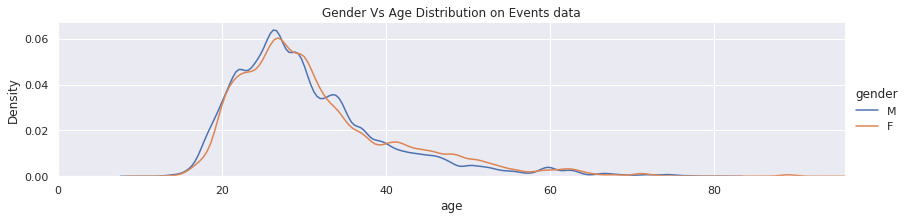

In [ ]:
plt.figure(figsize=(15,5))
facet = sns.FacetGrid(df_final, hue="gender",aspect=4, hue_order=['M', 'F'])
facet.map(sns.kdeplot,'age')
facet.set(xlim=(0, df_final['age'].max()))
facet.add_legend()
plt.title("Gender Vs Age Distribution on Events data")

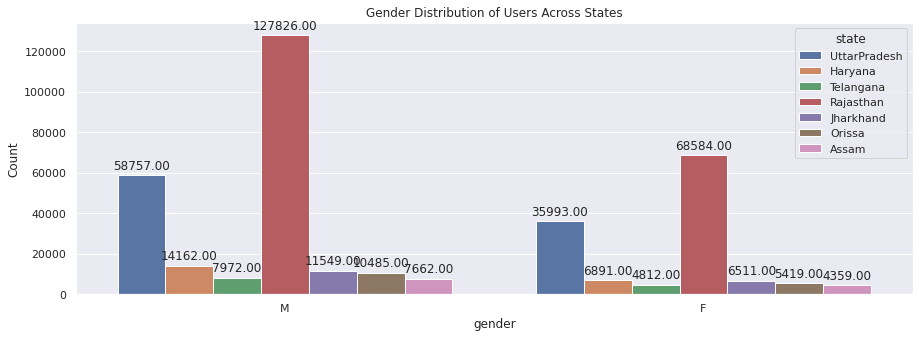

In [ ]:
total = len(user_data['gender'])*1.
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
splot = sns.countplot(x='gender', hue="state", data=df_final, ax=axis1)
plt.title("Gender Distribution of Users Across States")
plt.ylabel('Count')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


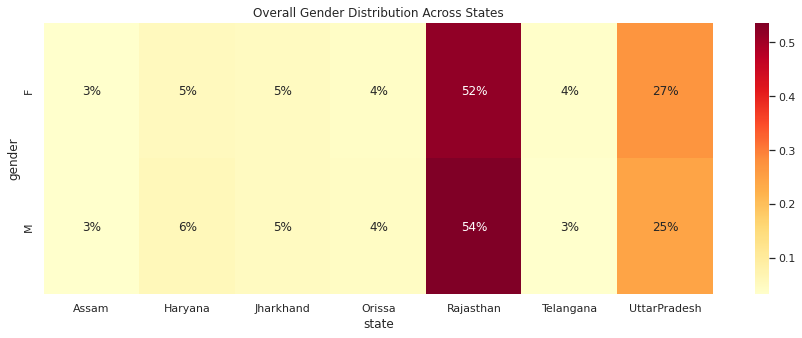

In [ ]:
plt.figure(figsize=(15,5))
role_ed_xtab = pd.crosstab(df_final['gender'], df_final['state'], normalize='index')
sns.heatmap(role_ed_xtab, annot=True, fmt='0.0%', cmap='YlOrRd')
plt.title("Overall Gender Distribution Across States")
plt.savefig("Overall Gender distribution across states.png")

###### 6.4 Distribution of Users across Age Segments

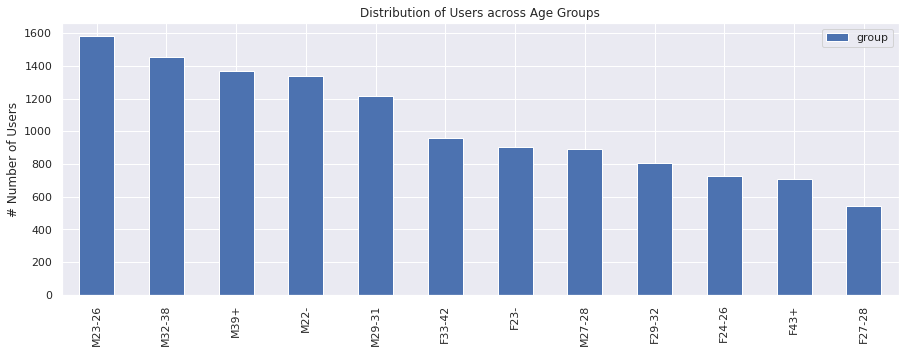

In [ ]:
plt.figure(figsize=(15,5))
user_data['group'].value_counts().plot(kind='bar')
plt.title('Distribution of Users across Age Groups');
plt.ylabel('# Number of Users');
plt.legend();
plt.savefig("Distribution of Users across Age Groups.png")

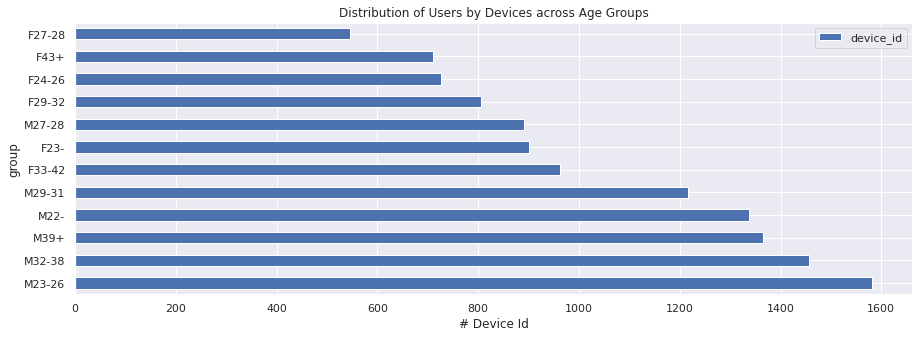

In [ ]:
plt.figure(figsize=(15,5))
user_data.groupby('group').device_id.count().sort_values(ascending=False).plot(kind='barh')
plt.title('Distribution of Users by Devices across Age Groups');
plt.xlabel('# Device Id');
plt.legend();

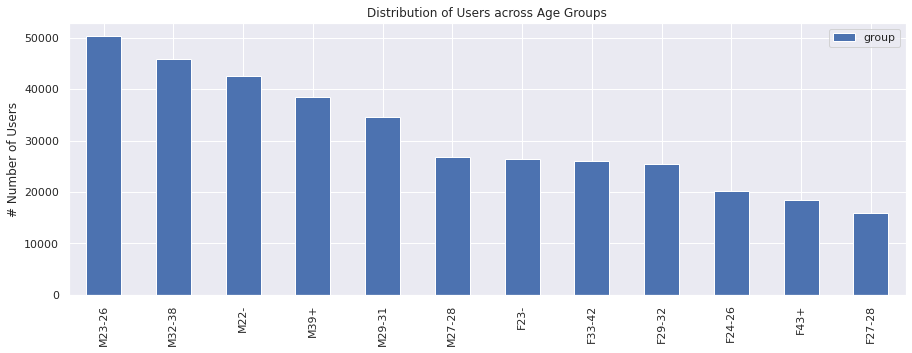

In [ ]:
plt.figure(figsize=(15,5))
df_final['group'].value_counts().plot(kind='bar')
plt.title('Distribution of Users across Age Groups');
plt.ylabel('# Number of Users');
plt.legend();

In [ ]:
age_group = [] 
for value in user_data['age']: 
    if value <=10: 
        age_group.append("Group-1") 
    elif value >10 and value <=20: 
        age_group.append("Group-2") 
    elif value>20 and value<=30:
        age_group.append("Group-3")
    elif value>30 and value<=40:
        age_group.append("Group-4")
    elif value>40 and value<=50:
        age_group.append("Group-5")
    elif value>50 and value<=60:
        age_group.append("Group-6")
    elif value>60 and value<=70:
        age_group.append("Group-7")
    elif value>70 and value<=80:
        age_group.append("Group-8")
    elif value>80 and value<=90:
        age_group.append("Group-9")
    else: 
        age_group.append("Group-10") 
        
user_data['age_group'] = age_group  

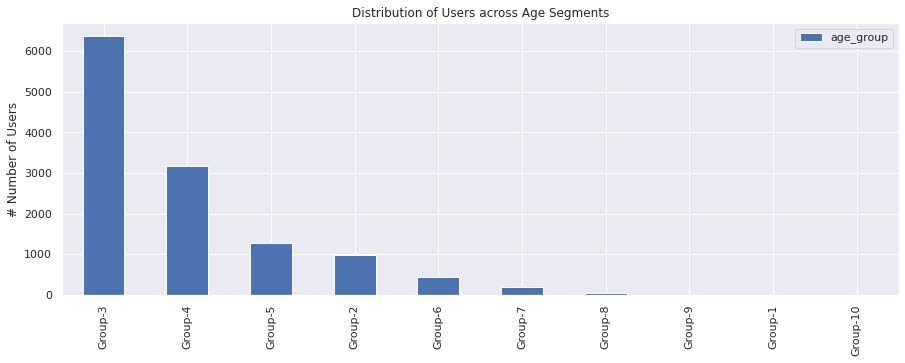

In [ ]:
plt.figure(figsize=(15,5))
user_data['age_group'].value_counts().plot.bar()
plt.title('Distribution of Users across Age Segments');
plt.ylabel('# Number of Users');
plt.legend();

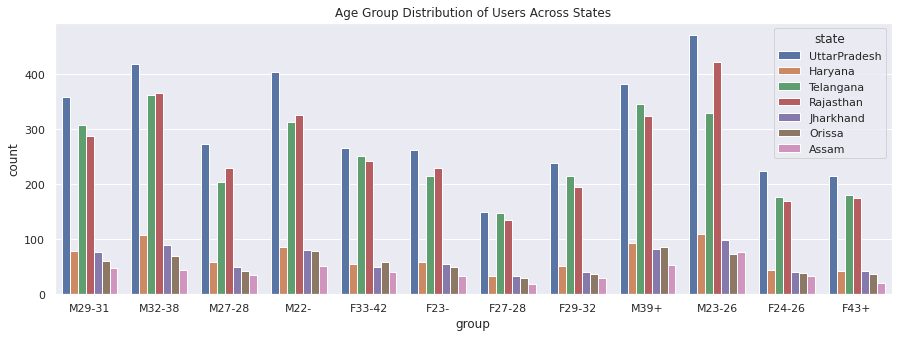

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='group', hue="state", data=user_data, ax=axis1)
plt.title("Age Group Distribution of Users Across States")
plt.savefig("Distribution of Users across Age Groups across various states.png")

Text(0.5, 1.0, 'Overall Age Group Distribution Across States')

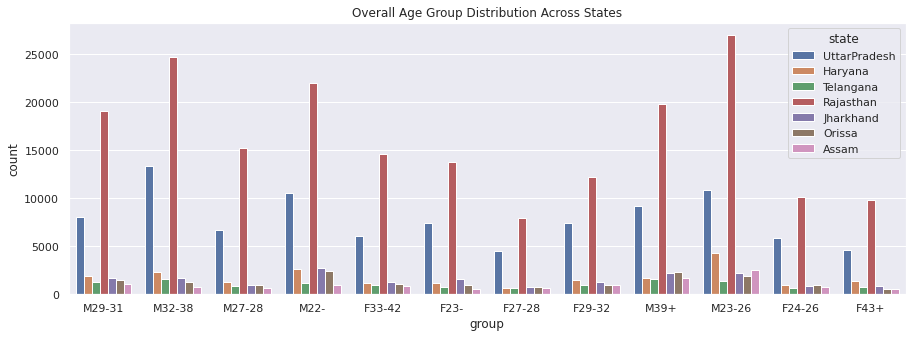

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='group', hue="state", data=df_final, ax=axis1)
plt.title("Overall Age Group Distribution Across States")

In [ ]:
df_UP = df_final[df_final.state=='UttarPradesh']
df_Rajasthan = df_final[df_final.state=='Rajasthan']
df_Haryana = df_final[df_final.state=='Haryana']
df_Jharkhand = df_final[df_final.state=='Jharkhand']
df_Orissa = df_final[df_final.state=='Orissa']
df_Telangana = df_final[df_final.state=='Telangana']
df_Assam = df_final[df_final.state=='Assam']

######6.5 Distribution of Phone Brands (10 Most used Phone Brand) for each State, Age segment and Gender

***TOP 10 PHONE BRANDS DISTRIBUTION***

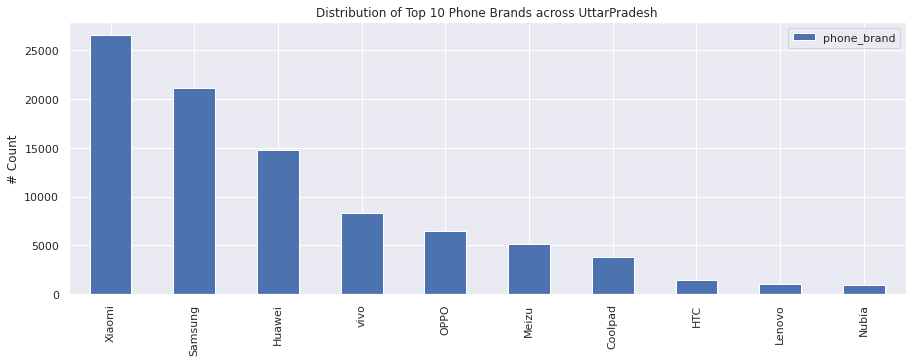

In [ ]:
plt.figure(figsize=(15,5))
df_UP['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across UttarPradesh');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across UP.png")

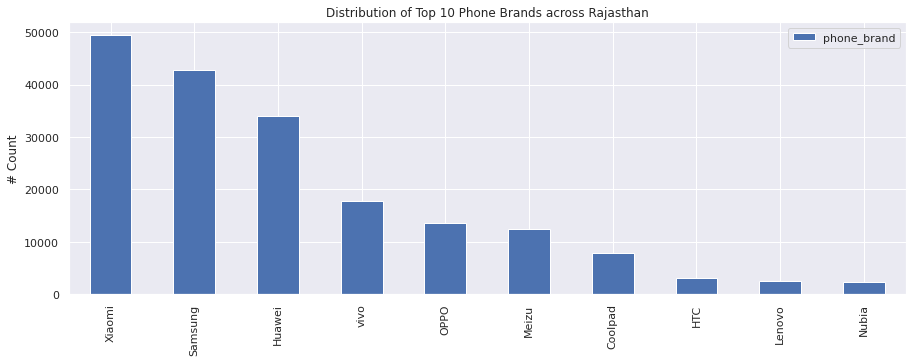

In [ ]:
plt.figure(figsize=(15,5))
df_Rajasthan['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across Rajasthan');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across Rajasthan.png")

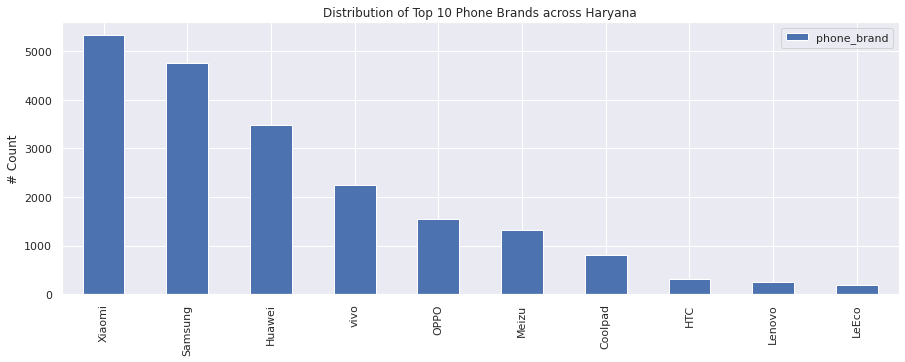

In [ ]:
plt.figure(figsize=(15,5))
df_Haryana['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across Haryana');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across Haryana.png")

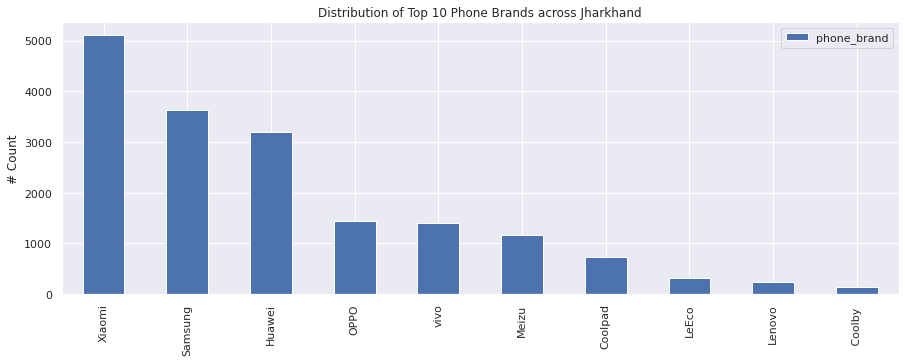

In [ ]:
plt.figure(figsize=(15,5))
df_Jharkhand['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across Jharkhand');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across Jharkhand.png")

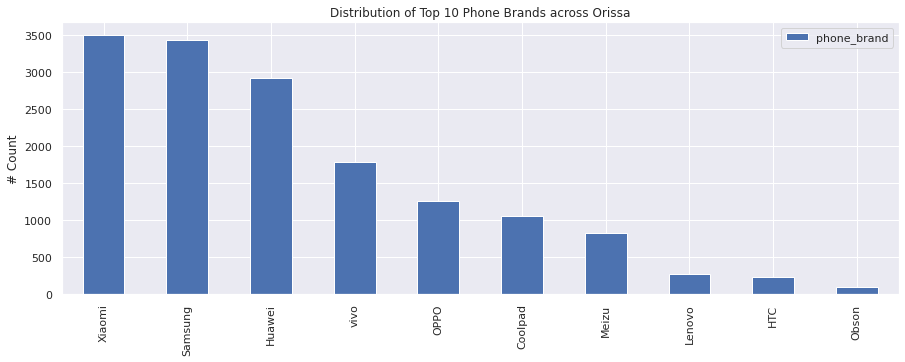

In [ ]:
plt.figure(figsize=(15,5))
df_Orissa['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across Orissa');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across Orissa.png")

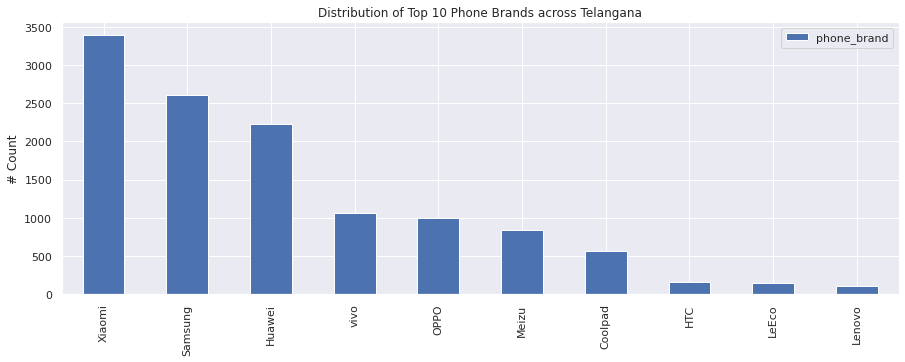

In [ ]:
plt.figure(figsize=(15,5))
df_Telangana['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across Telangana');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across Telangana.png")

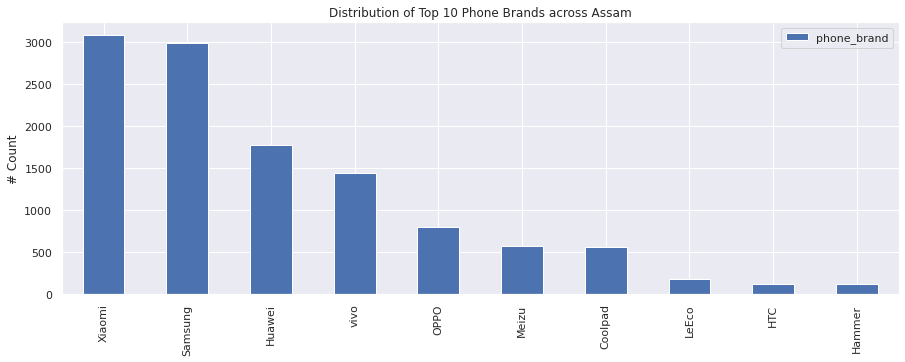

In [ ]:
plt.figure(figsize=(15,5))
df_Assam['phone_brand'].value_counts().head(10).plot.bar()
plt.title('Distribution of Top 10 Phone Brands across Assam');
plt.ylabel('# Count');
plt.legend();
plt.savefig("Distribution of top 10 phone brands across across Assam.png")

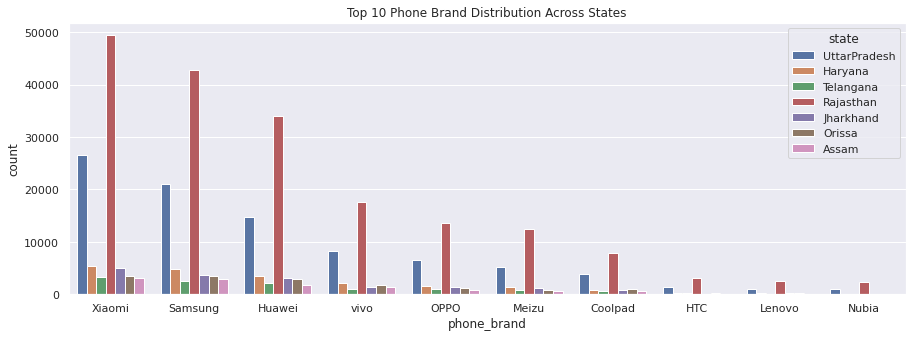

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='phone_brand', hue="state",order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across States")
plt.savefig("Distribution of top 10 phone brands across across states.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


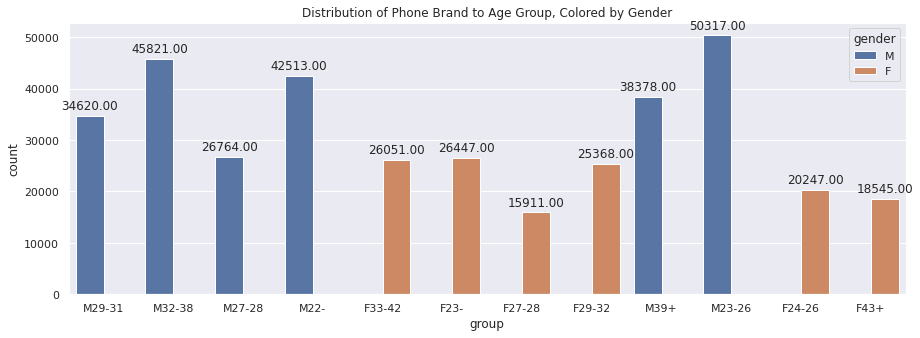

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
splot = sns.countplot('group', hue='gender', data=df_final);
plt.title('Distribution of Phone Brand to Age Group, Colored by Gender');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig("Distribution of top 10 phone brands across by Age and Gender.png")

######6.6 Distribution of Gender for each State, Age Segment and Phone Brand (10 Most used Phone Brands)

***GENDER DISTRIBUTION***

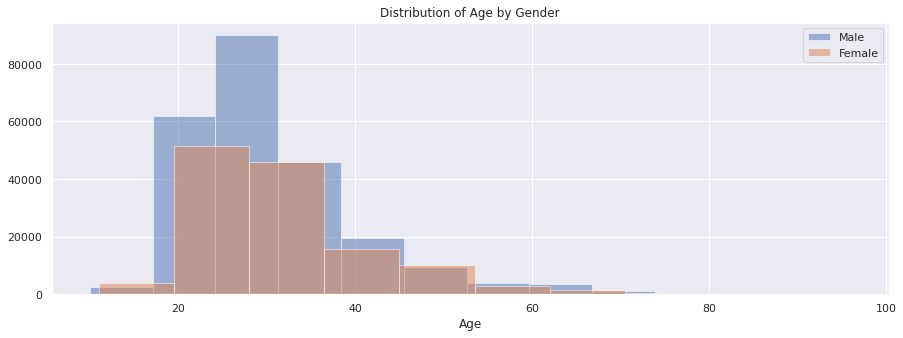

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('age', data=df_final[df_final['gender'] == 'M'], alpha=0.5, label='Male');
plt.hist('age', data=df_final[df_final['gender'] == 'F'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();
plt.savefig("Distribution of Age by Gender.png")

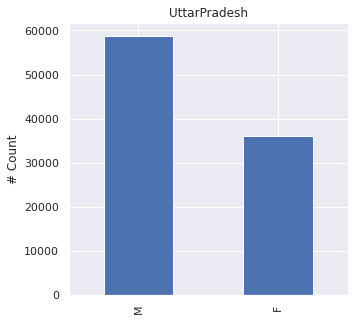

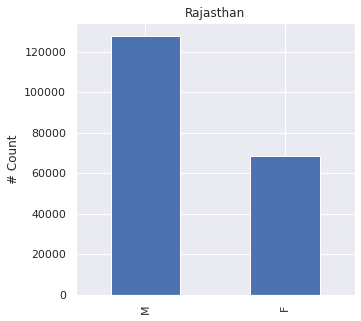

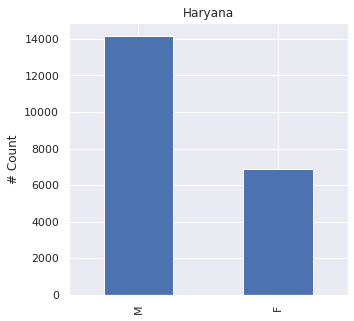

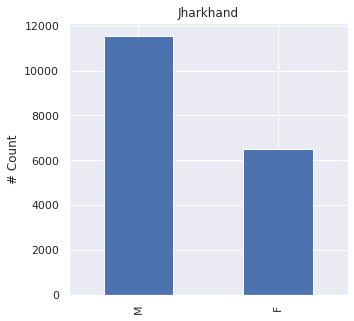

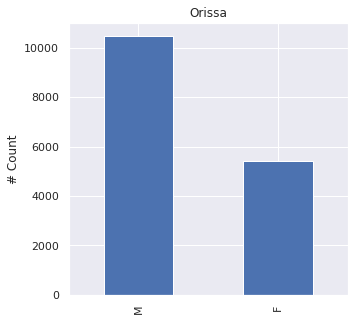

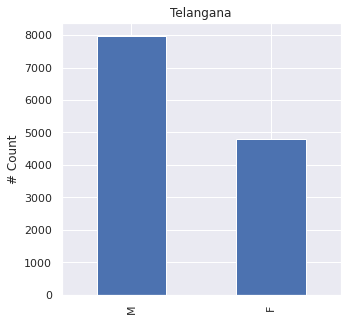

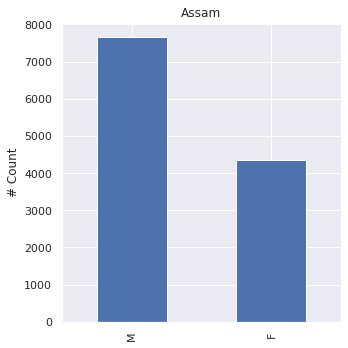

In [ ]:
states = ['UttarPradesh', 'Rajasthan', 'Haryana', 'Jharkhand', 'Orissa', 'Telangana', 'Assam']

for state in states:
    fig, axes = plt.subplots(figsize=(5,5))
    df_final[df_final['state']==state]['gender'].value_counts().head().plot.bar()
    plt.title(state)
    plt.ylabel('# Count')
fig.tight_layout()
fig.show()

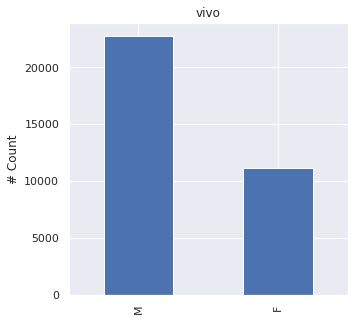

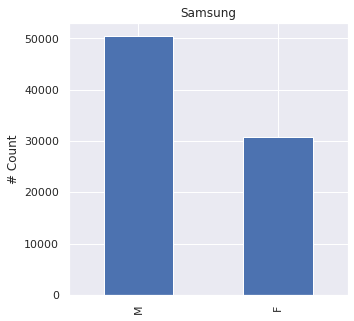

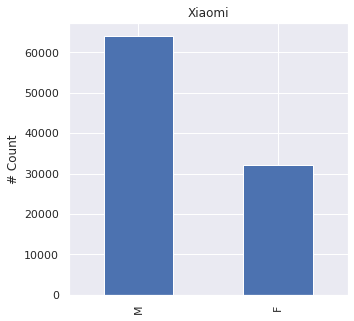

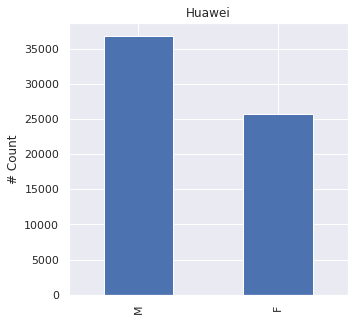

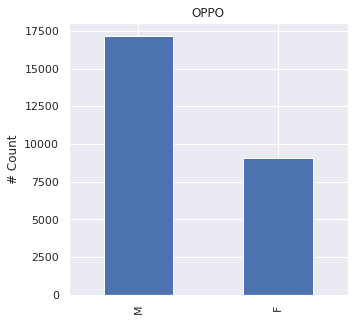

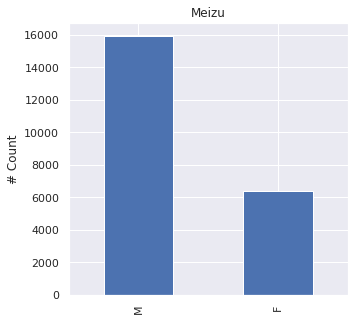

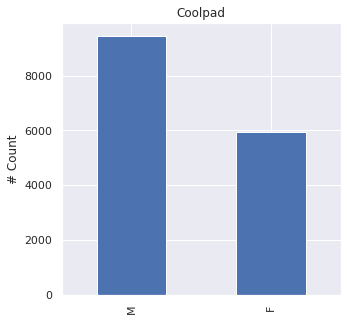

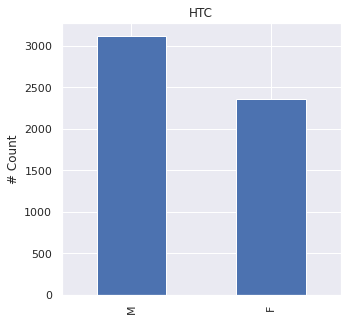

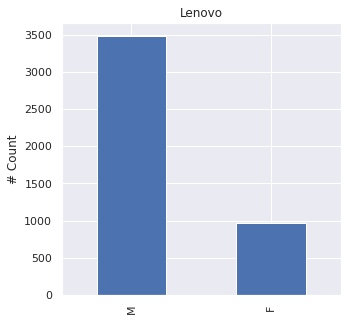

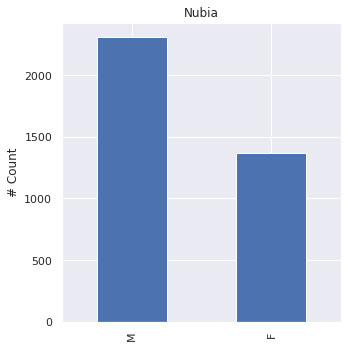

In [ ]:
phone_brands_top10 = ['vivo', 'Samsung', 'Xiaomi', 'Huawei', 'OPPO', 'Meizu', 'Coolpad', 'HTC', 'Lenovo','Nubia']

for phone_brand in phone_brands_top10:
    fig, axes = plt.subplots(figsize=(5,5))
    df_final[df_final['phone_brand']==phone_brand]['gender'].value_counts().head().plot.bar()
    plt.title(phone_brand)
    plt.ylabel('# Count')
fig.tight_layout()
fig.show()

In [ ]:
df_UP = df_final[df_final.state=='UttarPradesh']
df_Rajasthan = df_final[df_final.state=='Rajasthan']
df_Haryana = df_final[df_final.state=='Haryana']
df_Jharkhand = df_final[df_final.state=='Jharkhand']
df_Orissa = df_final[df_final.state=='Orissa']
df_Telangana = df_final[df_final.state=='Telangana']
df_Assam = df_final[df_final.state=='Assam']

######6.7 Distribution of Age segments for each State, Gender and Phone Brand(10 Most used Phone Brands)

***AGE DISTRIBUTION***

In [ ]:
df_final['state'].value_counts()

Rajasthan       196410
UttarPradesh     94750
Haryana          21053
Jharkhand        18060
Orissa           15904
Telangana        12784
Assam            12021
Name: state, dtype: int64

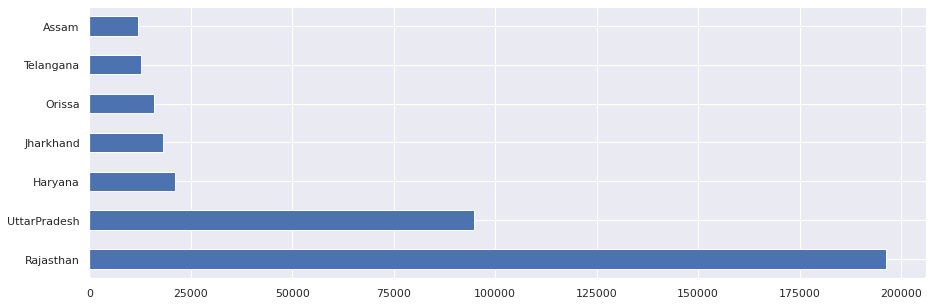

In [ ]:
plt.figure(figsize=(15,5))
df_final['state'].value_counts().plot.barh()

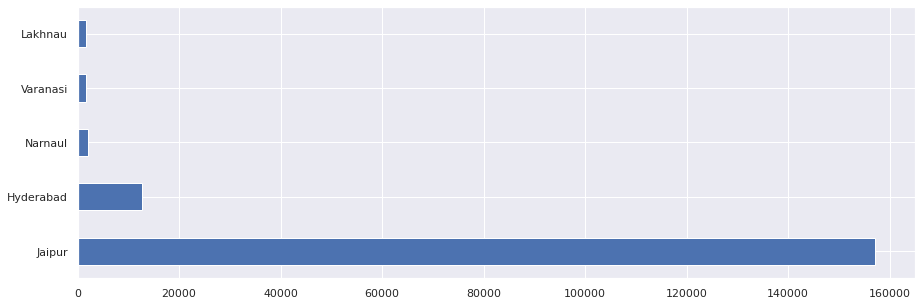

In [ ]:
plt.figure(figsize=(15,5))
df_final['city'].value_counts().head().plot.barh()

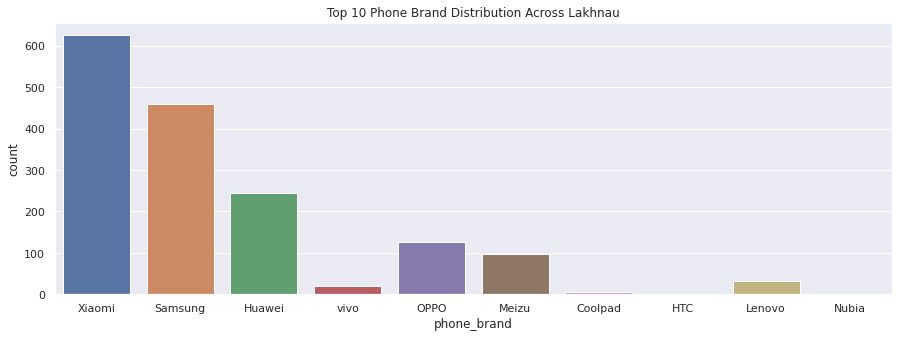

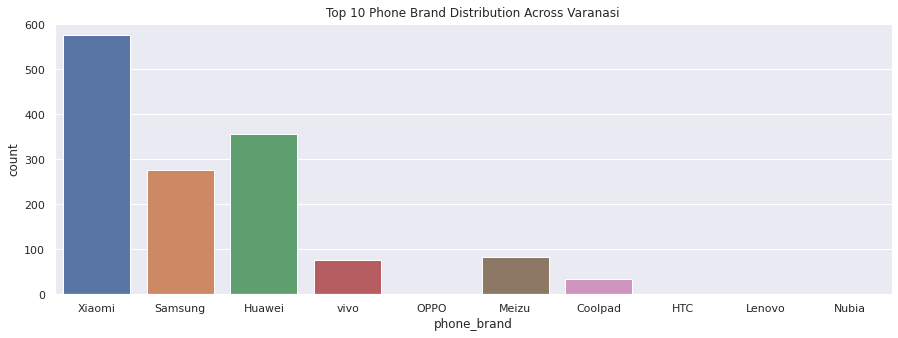

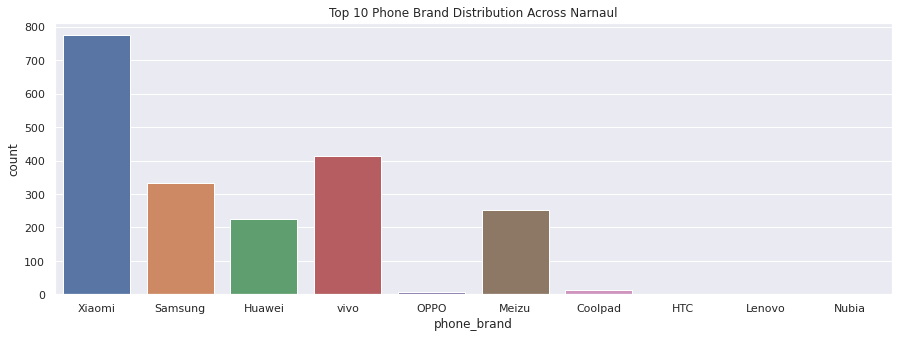

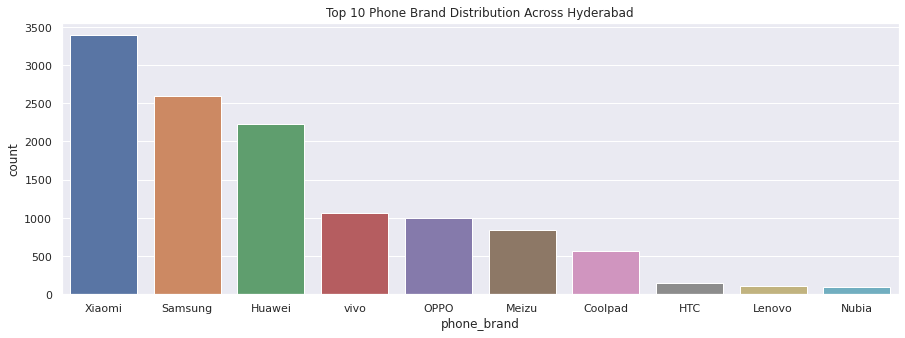

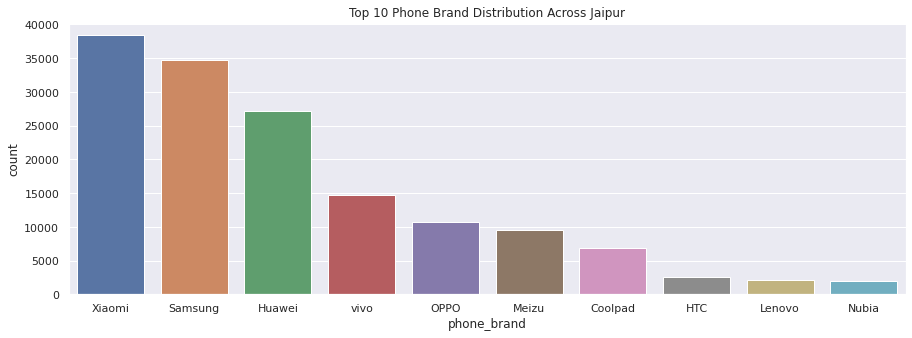

In [ ]:
list_metro_cities = ['Lakhnau', 'Varanasi', 'Narnaul', 'Hyderabad', 'Jaipur']
for i in list_metro_cities:
    #print (i)
    #print (df_final[df_final['city']==i]['device_model'].value_counts().head(10))
    fig, axis1 = plt.subplots(1,1,figsize=(15,5))
    sns.countplot(x='phone_brand' ,order=df_final.phone_brand.value_counts().iloc[:10].index, data=df_final[df_final['city']==i], ax=axis1)
    plt.title("Top 10 Phone Brand Distribution Across " + i)

In [ ]:
metro_city_data = df_final[df_final.city.isin(list_metro_cities)]

In [ ]:
metro_city_data.groupby(['gender','city'])['city'].count()

gender  city     
F       Hyderabad      4812
        Jaipur        54418
        Lakhnau         431
        Narnaul         340
        Varanasi        953
M       Hyderabad      7972
        Jaipur       102628
        Lakhnau        1198
        Narnaul        1693
        Varanasi        680
Name: city, dtype: int64

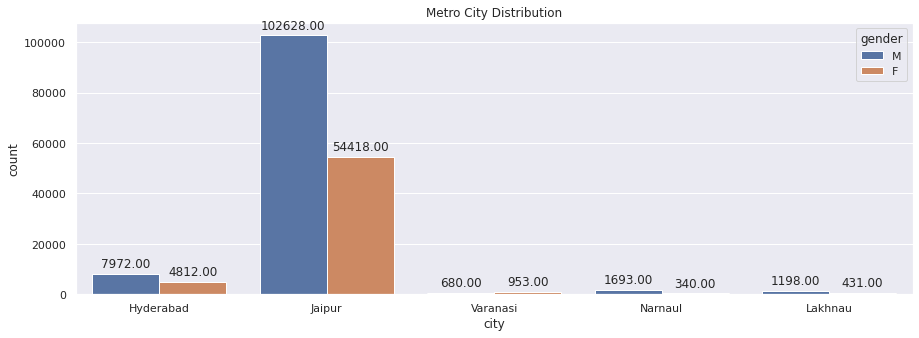

In [ ]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
splot = sns.countplot(x='city', hue='gender', data=metro_city_data, ax=axis1)
plt.title("Metro City Distribution")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

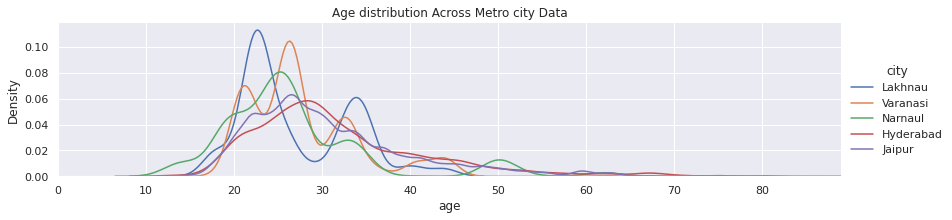

In [ ]:
facet = sns.FacetGrid(metro_city_data, hue="city",aspect=4, hue_order=['Lakhnau', 'Varanasi', 'Narnaul', 'Hyderabad', 'Jaipur'])
facet.map(sns.kdeplot,'age') 
facet.set(xlim=(0, metro_city_data['age'].max()))
facet.add_legend()
plt.title("Age distribution Across Metro city Data")
plt.savefig("Distribution of Age segments across Metro cities.png")

In [ ]:
non_metro_city_data = df_final[~df_final['city'].isin(list_metro_cities)]

In [ ]:
non_metro_city_data['city'].value_counts().head(7)

Bari          1584
Bisalpur      1558
Chandausi     1502
Tanda         1491
Agra          1440
Aonla         1430
Ganganagar    1417
Name: city, dtype: int64

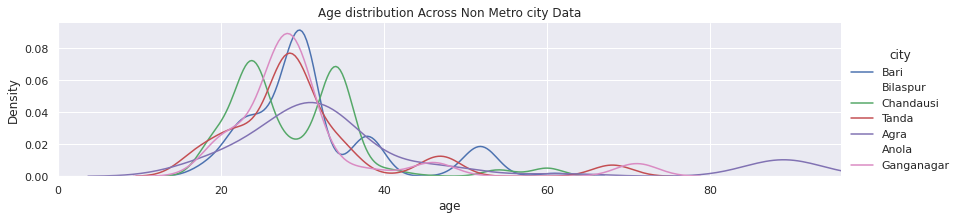

In [ ]:
facet = sns.FacetGrid(non_metro_city_data, hue="city",aspect=4, hue_order=['Bari','Bilaspur','Chandausi','Tanda','Agra','Anola','Ganganagar'])
facet.map(sns.kdeplot,'age') 
facet.set(xlim=(0, non_metro_city_data['age'].max()))
facet.add_legend()
plt.title("Age distribution Across Non Metro city Data")
plt.savefig("Distribution of Age segments across Non Metro cities.png")

In [ ]:
x = df_final['phone_brand'].value_counts().head(10)
x

Xiaomi     96327
Samsung    81289
Huawei     62484
vivo       33911
OPPO       26219
Meizu      22348
Coolpad    15388
HTC         5480
Lenovo      4448
Nubia       3675
Name: phone_brand, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


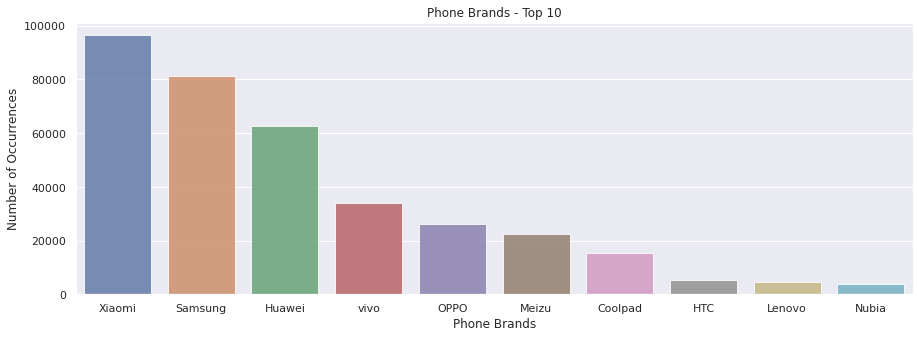

In [ ]:
brand_count  = df_final['phone_brand'].value_counts()
brand_count = brand_count[:10,]
plt.figure(figsize=(15,5))
sns.barplot(brand_count.index, brand_count.values, alpha=0.8)
plt.title('Phone Brands - Top 10')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Phone Brands', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


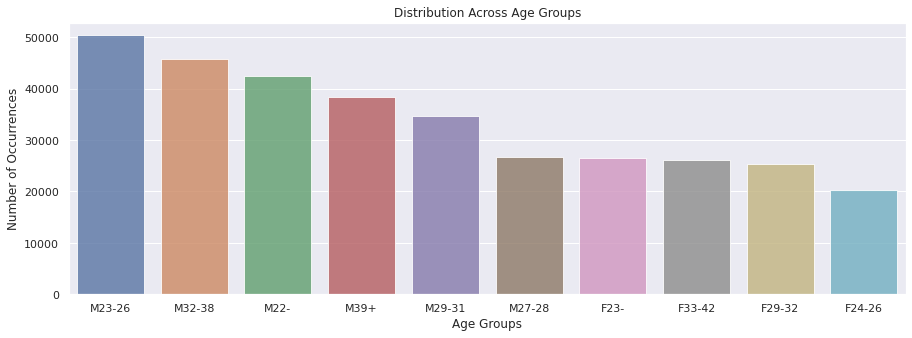

<Figure size 432x288 with 0 Axes>

In [ ]:
group_count  = df_final['group'].value_counts()
group_count = group_count[:10,]
plt.figure(figsize=(15,5))
sns.barplot(group_count.index, group_count.values, alpha=0.8)
plt.title('Distribution Across Age Groups')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age Groups', fontsize=12)
plt.show()
plt.savefig('Distribution of Age by top10 phone brand occurences')

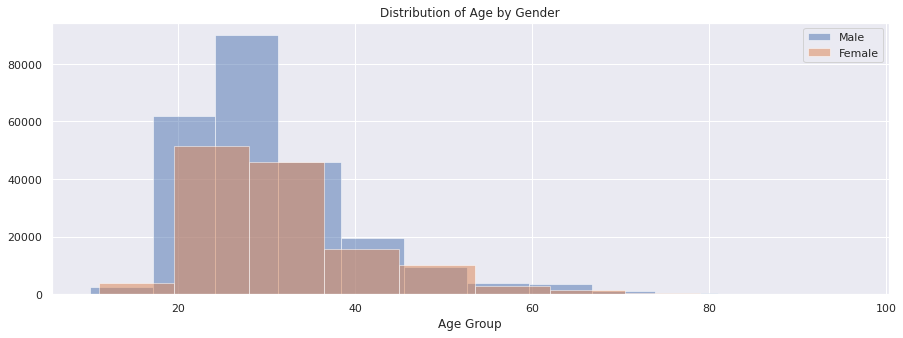

In [ ]:
plt.figure(figsize=(15,5))
plt.hist('age', data=df_final[df_final['gender'] == 'M'], alpha=0.5, label='Male');
plt.hist('age', data=df_final[df_final['gender'] == 'F'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age Group');
plt.legend();
plt.savefig('Distribution of Age by Gender')

######6.8 Hourly distribution of Phone Calls

In [ ]:
df_final.sample(10)

,device_id,phone_brand,device_model,gender,age,group,event_id,timestamp,longitude,latitude,city,state
104176,"-6,314,379,822,687,443,968.0",Xiaomi,MI 2A,F,30,F29-32,315799,2016-05-05 18:44:33,91.0,26.4,Barpeta,Assam
58517,"4,506,894,058,781,964,288.0",Xiaomi,ELIFE S5.5,F,19,F23-,662713,2016-05-06 12:39:22,76.3,29.4,Jind,Haryana
142132,"-1,686,657,308,477,788,160.0",vivo,X5L,M,40,M39+,3133470,2016-05-06 07:55:02,77.1,29.0,Sonipat,Haryana
278505,"-192,566,863,824,020,992.0",Xiaomi,红米2,M,24,M23-26,1595943,2016-05-07 03:08:00,80.6,27.2,Sandila,UttarPradesh
343120,"3,032,089,151,740,683,776.0",Xiaomi,红米2,F,28,F27-28,623736,2016-05-06 07:28:01,92.8,26.6,Tezpur,Assam
369730,"-6,678,497,720,231,284,736.0",Xiaomi,Redmi note,M,28,M27-28,1581206,2016-05-06 13:25:58,75.9,27.0,Jaipur,Rajasthan
22074,"-8,442,311,445,931,072,512.0",Samsung,Galaxy Grand Neo Plus,M,28,M27-28,250992,2016-05-03 12:29:13,75.8,26.9,Jaipur,Rajasthan
14516,"8,994,276,715,573,094,400.0",Xiaomi,MI 4,F,25,F24-26,104695,2016-05-02 20:37:20,75.9,26.9,Jaipur,Rajasthan
368522,"2,182,234,827,419,744,768.0",Samsung,Galaxy S2,M,46,M39+,1499422,2016-05-02 10:02:44,76.4,26.1,SawaiMadhopur,Rajasthan
93880,"-7,151,254,314,433,017,856.0",Huawei,Honor Play 4X,M,19,M22-,691604,2016-05-06 15:27:30,76.9,30.4,AmbalaCantonment,Haryana


In [ ]:
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

In [ ]:
df_final['date'] = pd.to_datetime(df_final['timestamp']).dt.date
df_final['time'] = pd.to_datetime(df_final['timestamp']).dt.time
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['month']= pd.to_datetime(df_final['timestamp']).dt.month

In [ ]:
def finding_time_range(val):
    if(val >= time(8,0) and val < time(12,0)):
        return '08 to 12'
    elif(val >= time(12,0) and val < time(16,0)):
        return '12 to 16'
    elif(val >= time(16,0) and val < time(20,0)):
        return '16 to 20'
    elif(val >= time(20,0) and val < time(23,59)):
        return '20 to 00'
    elif(val >= time(0,0) and val < time(4,0)):
        return '00 to 04'
    elif(val >= time(4,0) and val < time(8,0)):
        return '04 to 08'

In [ ]:
df_final['timestamp'].sample(10)

186532   2016-05-04 03:12:58
232267   2016-05-05 16:20:55
329296   2016-05-03 07:17:50
344835   2016-05-04 15:01:15
344281   2016-05-01 11:37:58
84501    2016-05-03 15:22:16
52912    2016-05-03 11:34:30
128905   2016-05-01 15:43:39
347798   2016-05-03 14:13:41
367342   2016-05-04 07:01:13
Name: timestamp, dtype: datetime64[ns]

In [ ]:
df_final.head(3)

,device_id,phone_brand,device_model,gender,age,group,event_id,timestamp,longitude,latitude,city,state,date,time,month
0,"245,133,531,816,851,872.0",SUGAR,时尚手机,M,30,M29-31,1051738,2016-05-07 20:09:19,77.7,27.6,Mathura,UttarPradesh,2016-05-07,20:09:19,5
1,"245,133,531,816,851,872.0",SUGAR,时尚手机,M,30,M29-31,1620945,2016-05-07 20:10:19,77.7,27.6,Mathura,UttarPradesh,2016-05-07,20:10:19,5
2,"245,133,531,816,851,872.0",SUGAR,时尚手机,M,30,M29-31,2132492,2016-05-07 20:13:57,77.7,27.6,Mathura,UttarPradesh,2016-05-07,20:13:57,5


In [ ]:
df_final['time_range'] = df_final['timestamp'].dt.hour

<Figure size 1080x360 with 0 Axes>

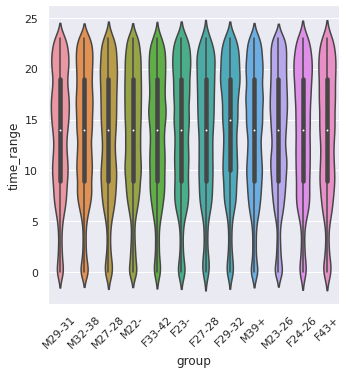

In [ ]:
plt.figure(figsize=(15,5))
g = sns.catplot(x="group", y='time_range', kind="violin", data=df_final)
g.set_xticklabels(rotation=45)

**Hourly Distribution of Phonecalls by Age group for Males**

<Figure size 1080x360 with 0 Axes>

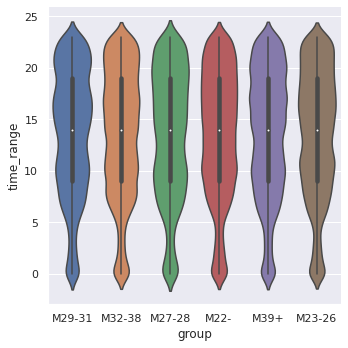

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x="group", y='time_range', kind="violin", data=df_final[df_final['gender']=='M'])

**Hourly Distribution of Phonecalls by Age group for Females**

<Figure size 1080x360 with 0 Axes>

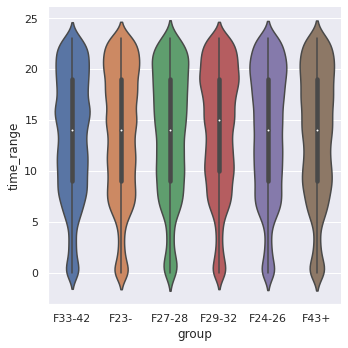

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(x="group", y='time_range', kind="violin", data=df_final[df_final['gender']=='F'])

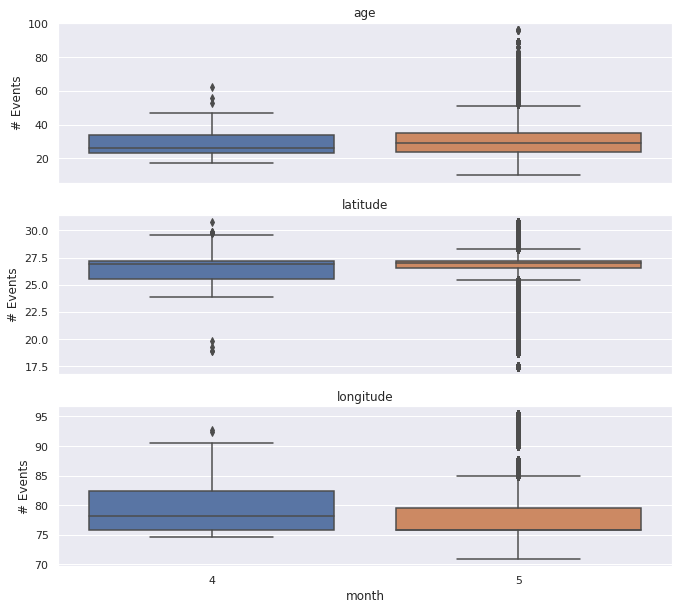

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["age", "latitude", "longitude"], axes):
    sns.boxplot(data=df_final, x='month', y=name, ax=ax)
    ax.set_ylabel('# Events')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

######6.9 Users on the Map using any suitable package

In [ ]:
#folium map of users data
map_user = folium.Map(location=[22, 77], zoom_start=5)

mCluster2222 = folium.MarkerCluster().add_to(map_user)

locations28 = user_data[['latitude', 'longitude']]
locationlist222 = locations28.values.tolist()
    
for item in enumerate(locationlist222):
        folium.Marker(location=item, popup="Jaipur").add_to(mCluster2222)

folium.LayerControl().add_to(map_user)                             
map_lon.save("User Map.html")
map_lon

In [ ]:
user_data

,index,device_id,phone_brand,device_model,gender,age,group,longitude,latitude,city,state,age_group
0,0,"245,133,531,816,851,872.0",SUGAR,时尚手机,M,30,M29-31,77.7,27.6,Mathura,UttarPradesh,Group-3
1,4,"-8,098,239,495,777,311,744.0",Xiaomi,MI 2S,M,38,M32-38,75.8,29.2,Hisar,Haryana,Group-4
2,43,"-7,271,319,853,104,671,744.0",Samsung,Galaxy Note 2,M,27,M27-28,78.5,17.4,Hyderabad,Telangana,Group-3
3,44,"-2,871,140,782,885,206,528.0",Coolpad,大神Note,M,22,M22-,79.6,25.6,Rath,UttarPradesh,Group-3
4,68,"-5,349,338,524,207,284,224.0",Samsung,乐檬K3 Note,M,27,M27-28,75.9,27.0,Jaipur,Rajasthan,Group-3
...,...,...,...,...,...,...,...,...,...,...,...,...
12495,370831,"-4,134,365,653,538,133,504.0",Xiaomi,MI 4,M,34,M32-38,78.4,29.7,Najibabad,UttarPradesh,Group-4
12496,370832,"6,667,638,254,331,784,192.0",Focus,M310,M,30,M29-31,75.9,27.0,Jaipur,Rajasthan,Group-3
12497,370932,"-183,111,621,324,650,880.0",Xiaomi,MI 3,M,26,M23-26,78.1,27.6,Hathras,UttarPradesh,Group-3
12498,370962,"-6,036,435,451,071,138,816.0",Xiaomi,MI 4,M,26,M23-26,78.5,17.4,Hyderabad,Telangana,Group-3


In [ ]:
map_Users = folium.Map(location=[22.356359, 79.395484], zoom_start=5)
mc_user2 = folium.MarkerCluster().add_to(map_Users)
state_list = ['UttarPradesh', 'Rajasthan', 'Haryana', 'Jharkhand', 'Orissa', 'Telangana','Assam']

for state in state_list:
    mapping_data = user_data[['latitude', 'longitude','city']][user_data['state']==state].drop_duplicates()
    citylist = mapping_data['city'].tolist()
        
    locations = user_data[['latitude', 'longitude']]
    locationlist = locations.values.tolist()
    
    for item in enumerate(locationlist):
        mc_user2.add_child(folium.Marker(location=item, popup='jaipur'))
                             
map_Users.add_child(mc_user2)
map_Users.save("User_map_plot2.html")
map_Users

#Section 7. Conclusion

INSAID Telecom needs to have a well focused marketing plan with targeted promotional activity to become market leader.

*   Special promotional plan need to be developed that can engage with Female users.

*   Promotional programs that can resonate with younger generation from the age group of 20 to 40 years which becomes a niche focus with age group of 20 to 30 years within metro cities.

*   Bulk promotions across large user base of Rajasthan, Uttar Pradesh and Telangana will have high revenue potential.

*   Tie-ups with top brands like Xiaomi and Samsung with device level micro targeting will help drive higher RoI across advertising programs.

*   Carefully planned Go-To-Market strategy like running of promotional or ad campaigns during non-peak hours (10 am to 3 pm) and non peak working days – Mon, Tues, Thurs, Fri and Sun can have better user engagement.

	
There is a large active base of users that runs into millions for INSAID Telecom , they can scale up their business by up-selling to the young generation Male users by leveraging existing user base from metros like Jaipur, Lucknow, Hyderabad and Varanasi.

